# Evaluation of Predictions

In [ ]:
library(plyr)
library(sjmisc)
library(tidyverse)
library(yardstick)
library(plotly)
library(ggplot2)

In [ ]:
dir = "/home/jupyter/Domains_202003/data/output/dp_datapull_20220822/expiry_20170101_20220822_test.RDS"
df = readRDS(dir)

In [2]:
dir = '/home/jupyter/Domains_202003/data/output/dp_datapull_20220822'
list.files(path=dir, pattern = "expiry_20170101_20220822_test-.*.csv")


character(0)

In [10]:
predDir = '/home/jupyter/Domains_202003/data/output/dp_models_retrained_2021/preds'
# df = read.csv(file.path(predDir, 'preds_ensemble_2021.csv'))
df2 = read.csv(file.path(predDir, 'preds_test_with_meta_2021.csv'))

In [3]:
pred_cols <- colnames(df)[grepl("^pred_", colnames(df))]
colMeans(df[, pred_cols], na.rm=T)

pred_agg_rf_ALL  pred_agg_glm_ALL pred_seg2_glm_ALL  pred_seg_glm_ALL 
        0.1369379         0.1637522         0.1538768         0.1430527 
  pred_seg_rf_ALL  pred_seg2_rf_ALL     pred_ensemble 
        0.2282041         0.1766671         0.1170842

In [9]:
tmp = df[df$tld_registrar_index == "onlinego daddy",]
dim(tmp)

[1] 78363    60

In [14]:
pred_cols <- colnames(df2)[grepl("^pred_", colnames(df2))]
colMeans(df2[, pred_cols], na.rm=T)

pred_agg_rf_ALL  pred_agg_glm_ALL pred_seg2_glm_ALL  pred_seg_glm_ALL 
        0.1369379         0.1637522         0.1369914         0.1280711 
  pred_seg_rf_ALL  pred_seg2_rf_ALL     pred_meta_l10     pred_meta_auc 
        0.2043048         0.1572808         0.1568015         0.1559923 
   pred_meta_mape 
        0.1368049

In [11]:
tmp = df2[df2$tld_registrar_index == "onlinego daddy",]
dim(tmp)

[1] 78363    65

In [15]:
colMeans(tmp[, pred_cols], na.rm=T)

pred_agg_rf_ALL  pred_agg_glm_ALL pred_seg2_glm_ALL  pred_seg_glm_ALL 
        0.1685148         0.1887533         0.1910760         0.1874823 
  pred_seg_rf_ALL  pred_seg2_rf_ALL     pred_meta_l10     pred_meta_auc 
        0.1702506         0.1723980         0.1685148         0.1910760 
   pred_meta_mape 
        0.1910760

In [16]:
g = df2 %>% group_by(tld_registrar_index) %>%
    select(all_of(pred_cols)) %>%
    summarise_all(mean)
head(g)

Adding missing grouping variables: `tld_registrar_index`



tld_registrar_index pred_agg_rf_ALL pred_agg_glm_ALL pred_seg2_glm_ALL
1 fun1&1 internet     0.6030332       0.4617240        0.9010606        
2 fun101 domain       0.6312182       0.3400454        0.0000000        
3 fun1api             0.5244810       0.3169323        0.0000000        
4 fun1stdomains       0.4529778       0.4060051        0.0000000        
5 funactive 24        0.3510893       0.2689305        0.5197170        
6 funafrihost         0.5916438       0.4564855        0.0000000        
  pred_seg_glm_ALL pred_seg_rf_ALL pred_seg2_rf_ALL pred_meta_l10 pred_meta_auc
1 0.7118182        0.5968333       0.6661826        0.4617240     0.9010606    
2 0.0000000        0.0000000       0.0000000        0.0000000     0.0000000    
3 0.0000000        0.0000000       0.0000000        0.5244810     0.5244810    
4 0.0000000        0.0000000       0.0000000               NA            NA    
5 0.4033962        0.2491351       0.2152695        0.4033962     0.4033962    
6 0.0000000        0.0000000       0.0000000        0.0000000     0.0000000    
  pred_meta_mape
1 0.5968333     
2 0.0000000     
3 0.5244810     
4        NA     
5 0.4033962     
6 0.0000000

In [29]:
meta_pred_cols <- colnames(df2)[grepl("^pred_meta", colnames(df2))]
non_meta_pred_cols <- pred_cols[!pred_cols %in% meta_pred_cols]

for (col in meta_pred_cols) {
    t = replicate(6, g[[col]]) == g[, non_meta_pred_cols]
    t[is.na(t)] = T
    print(col)
    print(mean(rowSums(t) > 0))
}



[1] "pred_meta_l10"
[1] 1
[1] "pred_meta_auc"
[1] 1
[1] "pred_meta_mape"
[1] 1


In [34]:
colMeans(is.na(df[, non_meta_pred_cols]) == is.na(df2[, non_meta_pred_cols]), na.rm=T)

pred_agg_rf_ALL  pred_agg_glm_ALL pred_seg2_glm_ALL  pred_seg_glm_ALL 
        1.0000000         1.0000000         0.8902665         0.8952722 
  pred_seg_rf_ALL  pred_seg2_rf_ALL 
        0.8952722         0.8902665

In [35]:
table(is.na(df[, "pred_seg2_glm_ALL"]), is.na(df2[, "pred_seg2_glm_ALL"]))

       
          FALSE
  FALSE 1804118
  TRUE   222374

In [36]:
sum(is.na(df[, "pred_seg2_glm_ALL"]))

[1] 222374

In [37]:
print(dim(df))
length(unique(df$domain))

[1] 2026492      60


[1] 1985309

In [38]:
print(dim(df2))
length(unique(df2$domain))

[1] 2026492      65


[1] 1985309

In [61]:
pred_cols <- colnames(df2)[grepl("^pred_", colnames(df2))]
non_pred_cols <- colnames(df2)[!colnames(df2) %in% pred_cols]
dim(df2[!duplicated(df2[, non_pred_cols]),])

[1] 1985483      65

In [64]:
# tmp = df2[!duplicated(df2[, non_pred_cols]), ]
tmp <- tmp %>% group_by(domain) %>%
    mutate(n=n())
tmp <- tmp[order(tmp$domain),]
head(tmp[tmp$n>1,], 10)

domain          domain_id renewed_count renewal_type expiry_date
1  247support.site 170059586 1             FirstTime    2021-02-08 
2  247support.site 190221499 1             FirstTime    2021-06-20 
3  6dr7.site       186610789 1             FirstTime    2021-05-17 
4  6dr7.site       172934269 1             FirstTime    2021-02-22 
5  aajy.site       186610799 1             FirstTime    2021-05-17 
6  aajy.site       172933884 1             FirstTime    2021-02-22 
7  airtm.online    185834664 1             FirstTime    2021-05-10 
8  airtm.online    161416201 1             FirstTime    2021-01-10 
9  alaamtech.site  167296641 1             FirstTime    2021-01-26 
10 alaamtech.site  186712624 1             FirstTime    2021-05-18 
   creation_date creation_time       tld    registrar     reseller      ⋯
1  2020-02-08    2020-02-08 16:24:22 site   Go Daddy      Go Daddy      ⋯
2  2020-06-20    2020-06-20 10:58:03 site   Hostinger     Hostinger     ⋯
3  2020-05-17    2020-05-17 23:23:03 site   Dynadot       Dynadot       ⋯
4  2020-02-22    2020-02-22 15:52:26 site   URL Solutions URL Solutions ⋯
5  2020-05-17    2020-05-17 23:23:04 site   Dynadot       Dynadot       ⋯
6  2020-02-22    2020-02-22 15:47:39 site   URL Solutions URL Solutions ⋯
7  2020-05-10    2020-05-10 20:24:39 online Go Daddy      Go Daddy      ⋯
8  2020-01-10    2020-01-10 23:08:06 online 1&1 Internet  1&1 Internet  ⋯
9  2020-01-26    2020-01-26 21:38:51 site   Go Daddy      Go Daddy      ⋯
10 2020-05-18    2020-05-18 22:01:41 site   NameSilo      NameSilo      ⋯
   pred_seg_glm_ALL pred_seg_rf_ALL pred_seg2_rf_ALL l10_best_model  
1  0.137            0.113055826     0.11206839       pred_seg_glm_ALL
2  0.112            0.241754393     0.26592418       pred_seg_glm_ALL
3  0.025            0.109376195     0.11320002       pred_agg_rf_ALL 
4  0.058            0.004907595     0.02681736       pred_seg_rf_ALL 
5  0.028            0.023619235     0.01867224       pred_agg_rf_ALL 
6  0.097            0.026450095     0.05382384       pred_seg_rf_ALL 
7  0.238            0.233869639     0.24318749       pred_agg_rf_ALL 
8  0.346            0.287314026     0.26769816       pred_agg_glm_ALL
9  0.119            0.173164274     0.09881274       pred_seg_glm_ALL
10 0.082            0.047008164     0.18077965       pred_seg2_rf_ALL
   pred_meta_l10 auc_best_model    pred_meta_auc mape_best_model  
1  0.137000000   pred_seg_glm_ALL  0.137000000   pred_seg2_glm_ALL
2  0.112000000   pred_seg_glm_ALL  0.112000000   pred_agg_glm_ALL 
3  0.078794359   pred_agg_rf_ALL   0.078794359   pred_seg_glm_ALL 
4  0.004907595   pred_seg_rf_ALL   0.004907595   pred_seg_glm_ALL 
5  0.037758294   pred_agg_rf_ALL   0.037758294   pred_seg_glm_ALL 
6  0.026450095   pred_seg_rf_ALL   0.026450095   pred_seg_glm_ALL 
7  0.208416327   pred_seg2_glm_ALL 0.231000000   pred_seg2_glm_ALL
8  0.187106914   pred_seg_rf_ALL   0.287314026   pred_agg_rf_ALL  
9  0.119000000   pred_seg_glm_ALL  0.119000000   pred_seg2_glm_ALL
10 0.180779653   pred_seg2_glm_ALL 0.069000000   pred_seg_glm_ALL 
   pred_meta_mape n
1  0.17400000     2
2  0.02838058     2
3  0.02500000     2
4  0.05800000     2
5  0.02800000     2
6  0.09700000     2
7  0.23100000     2
8  0.29814104     2
9  0.13700000     2
10 0.08200000     2

In [47]:
# tmp <- df %>% group_by(domain) %>%
#     mutate(n=n())
# tmp <- tmp[order(tmp$domain), ]
tmp[tmp$n > 1, ]

domain                  domain_id renewed_count renewal_type expiry_date
1     000webhost.online       180279849 1             FirstTime    2021-03-27 
2     000webhost.online       180279849 1             FirstTime    2021-03-27 
3     00966.space             163176601 1             FirstTime    2021-01-17 
4     00966.space             163176601 1             FirstTime    2021-01-17 
5     00966.website           163176591 1             FirstTime    2021-01-17 
6     00966.website           163176591 1             FirstTime    2021-01-17 
7     0123movies.tech         190442889 1             FirstTime    2021-06-22 
8     0123movies.tech         190442889 1             FirstTime    2021-06-22 
9     0145215725.space        185211614 1             FirstTime    2021-05-04 
10    0145215725.space        185211614 1             FirstTime    2021-05-04 
11    040811470.space         182600189 1             FirstTime    2021-04-13 
12    040811470.space         182600189 1             FirstTime    2021-04-13 
13    06handmade.store        182402884 1             FirstTime    2021-04-11 
14    06handmade.store        182402884 1             FirstTime    2021-04-11 
15    0gravity.space          172742914 1             FirstTime    2021-02-21 
16    0gravity.space          172742914 1             FirstTime    2021-02-21 
17    0nyx.store              189108759 1             FirstTime    2021-06-09 
18    0nyx.store              189108759 1             FirstTime    2021-06-09 
19    1-drummer.space         181602204 1             FirstTime    2021-04-04 
20    1-drummer.space         181602204 1             FirstTime    2021-04-04 
21    1-problem.space         182048839 1             FirstTime    2021-04-08 
22    1-problem.space         182048839 1             FirstTime    2021-04-08 
23    100-casino.online       170346466 1             FirstTime    2021-02-10 
24    100-casino.online       170346466 1             FirstTime    2021-02-10 
25    1000000.website         184084214 1             FirstTime    2021-04-24 
26    1000000.website         184084214 1             FirstTime    2021-04-24 
27    10000consultants.online 163169741 1             FirstTime    2021-01-17 
28    10000consultants.online 163169741 1             FirstTime    2021-01-17 
29    10000consultants.tech   163169736 1             FirstTime    2021-01-17 
30    10000consultants.tech   163169736 1             FirstTime    2021-01-17 
⋮     ⋮                       ⋮         ⋮             ⋮            ⋮          
82334 zycietocud.online       185829779 1             FirstTime    2021-05-10 
82335 zycietocud.online       185829779 1             FirstTime    2021-05-10 
82336 zyciewpl.online         187691299 1             FirstTime    2021-05-27 
82337 zyciewpl.online         187691299 1             FirstTime    2021-05-27 
82338 zyciezpieniedzmi.online 187331309 1             FirstTime    2021-05-24 
82339 zyciezpieniedzmi.online 187331309 1             FirstTime    2021-05-24 
82340 zyia.store              191644064 1             FirstTime    2021-06-29 
82341 zyia.store              191644064 1             FirstTime    2021-06-29 
82342 zyjchwila.online        185624439 1             FirstTime    2021-05-08 
82343 zyjchwila.online        185624439 1             FirstTime    2021-05-08 
82344 zyjdobrze.online        187294854 1             FirstTime    2021-05-24 
82345 zyjdobrze.online        187294854 1             FirstTime    2021-05-24 
82346 zyjdobrze.site          187294839 1             FirstTime    2021-05-24 
82347 zyjdobrze.site          187294839 1             FirstTime    2021-05-24 
82348 zyjmarzeniami.online    186230954 1             FirstTime    2021-05-14 
82349 zyjmarzeniami.online    186230954 1             FirstTime    2021-05-14 
82350 zyjwpolscedobrze.online 187691339 1             FirstTime    2021-05-27 
82351 zyjwpolscedobrze.online 187691339 1             FirstTime    2021-05-27 
82352 zyjzcalychsil.online    186039309 1             Fi

In [59]:
# tmp2 = tmp[tmp$n > 1, ]
pred_cols <- colnames(tmp2)[grepl("^pred_", colnames(tmp2))]
non_pred_cols <- colnames(tmp2)[!colnames(tmp2) %in% pred_cols]
# non_pred_cols
# tmp2[c(1,2), non_pred_cols[tmp2[1,non_pred_cols] != tmp2[2,non_pred_cols]]]
mean(tmp2[1,non_pred_cols] == tmp2[2,non_pred_cols],na.rm=T)

[1] 1

In [60]:
recent_pred_date <- as.Date("2021-06-30")
directory_2021 <- paste0('/home/jupyter/Domains_202003/data/output/dp_datapull_', strftime(recent_pred_date, format="%Y%m%d"), '/')
test_dir <- paste0(directory_2021, 'expiry_20210104_', strftime(recent_pred_date, format="%Y%m%d"), '_test.RDS')
expiry_test_df <- readRDS(test_dir)
dim(expiry_test_df)

[1] 2115004      52

In [62]:
dim(expiry_test_df[!duplicated(expiry_test_df),])

[1] 2115004      52

In [67]:
exclude_tlds <- c('pw', 'in.net', 'uno')
exp = expiry_test_df[!expiry_test_df$tld %in% exclude_tlds, ]
dim(exp)

[1] 1985483      52

In [66]:
head(expiry_test_df)

domain                  domain_id renewed_count renewal_type expiry_date
1 benditofit.site         185775229 1             FirstTime    2021-05-10 
2 bznlook.store           188203224 1             FirstTime    2021-06-01 
3 dutch-daily.store       182134154 1             FirstTime    2021-04-09 
4 xn--bllehund-54a.online 185976604 1             FirstTime    2021-05-12 
5 qfcq209.pw              169972056 1             FirstTime    2021-02-08 
6 teac6gshw8jwtg.pw       180455554 1             FirstTime    2021-03-28 
  creation_date creation_time       tld    registrar            
1 2020-05-10    2020-05-10 02:19:57 site   eNom                 
2 2020-06-01    2020-06-01 20:04:27 store  eNom                 
3 2020-04-09    2020-04-09 05:09:30 store  Tucows               
4 2020-05-12    2020-05-12 04:10:11 online Domeneshop           
5 2020-02-08    2020-02-08 02:32:36 pw     West263 International
6 2020-03-28    2020-03-28 16:31:16 pw     GMO                  
  reseller              ⋯ mxdomain nameserver renewalprobability siccode
1 Nominalia             ⋯                     NA                 NA     
2 DreamHost             ⋯                     NA                 NA     
3 Hostnet.nl            ⋯                     NA                 NA     
4 Domeneshop            ⋯                     NA                 NA     
5 West263 International ⋯                     NA                 NA     
6 MuuMuu                ⋯                     NA                 NA     
  sicdivision sicmajorgroup ssl max_date log_reg_arpt tld_registrar_index    
1                                        -9.21034037  sitenominalia          
2                                         0.87546874  storedreamhost         
3                                         1.38629436  storehostnet.nl        
4                                        -9.21034037  onlinedomeneshop       
5                                         0.07696104  pwwest263 international
6                                        -0.69314718  pwmuumuu

In [70]:
# pred_test <- read.csv(file.path(predDir, "preds_test_2021.csv"))
pred_test_big <- read.csv(file.path(predDir, "preds_test_2021_big.csv"))
dim(pred_test_big)

[1] 1814262      59

In [71]:
pred_test_small <- read.csv(file.path(predDir, "preds_test_2021_small.csv"))
dim(pred_test_small)

[1] 212230     55

In [72]:
head(pred_test_small)

domain                domain_id renewed_count renewal_type expiry_date
1 benditofit.site       185775229 1             FirstTime    2021-05-10 
2 puebloartesano.site   185629829 1             FirstTime    2021-05-08 
3 danibar.site          185739904 1             FirstTime    2021-05-09 
4 klovn.site            185738669 1             FirstTime    2021-05-09 
5 inqualitasiurius.site 185751399 1             FirstTime    2021-05-09 
6 josecveasynube.site   185821279 1             FirstTime    2021-05-10 
  creation_date creation_time       tld  registrar reseller  ⋯ siccode
1 2020-05-10    2020-05-10 02:19:57 site eNom      Nominalia ⋯ NA     
2 2020-05-08    2020-05-08 11:12:03 site eNom      Nominalia ⋯ NA     
3 2020-05-09    2020-05-09 14:52:22 site eNom      Nominalia ⋯ NA     
4 2020-05-09    2020-05-09 14:35:56 site eNom      Nominalia ⋯ NA     
5 2020-05-09    2020-05-09 17:45:28 site eNom      Nominalia ⋯ NA     
6 2020-05-10    2020-05-10 17:37:22 site eNom      Nominalia ⋯ NA     
  sicdivision sicmajorgroup ssl max_date log_reg_arpt tld_registrar_index
1                                        -9.21034     sitenominalia      
2                                        -9.21034     sitenominalia      
3                                        -9.21034     sitenominalia      
4                                        -9.21034     sitenominalia      
5                                        -9.21034     sitenominalia      
6                                        -9.21034     sitenominalia      
  old_renewal_status pred_agg_rf_ALL pred_agg_glm_ALL
1 Not Renewd         0.1560702       0.06755735      
2 Not Renewd         0.1572780       0.06208155      
3 Not Renewd         0.1409831       0.06635964      
4 Not Renewd         0.1536575       0.06658615      
5 Not Renewd         0.1885022       0.06180069      
6 Not Renewd         0.1384204       0.06166029

In [69]:
dim(pred_test)

[1] 2026492      59

In [ ]:
# Domains in both big and small?
cols <- c("domain", "tld_registrar_index", )


In [75]:
cat("reading in first training data\n")
today <- as.Date("2021-02-23")
maxdate <- today - 50
mindate <- maxdate - 456
date_split1 <- as.Date("2020-04-13")
date_split2 <- as.Date("2020-10-24")
directory <- '/home/jupyter/Domains_202003/data/output/dp_datapull_20210223/'

train1_str <- paste0('expiry_',format(mindate, format="%Y%m%d"),'_',format(date_split1, format="%Y%m%d") ,'_train1.RDS')
expiry_train1_df <- readRDS(paste0(directory, train1_str))
expiry_train1_df$old_renewal_status <- expiry_train1_df$renewal_status
#     expiry_train1_df$renewal_status <- as.integer(expiry_train1_df$renewal_status == "Renewed")
expiry_train1_df$renewal_status <- as.integer(expiry_train1_df$renewal_status %in% c("Renewed", "Transfered"))
expiry_train1_list <- split(expiry_train1_df, expiry_train1_df$tld_registrar_index)

# Define tld-re's for training
cat("defining tld-re's\n")
exclude_tlds <- c('pw', 'in.net', 'uno')
include_reg <- expiry_train1_df %>% 
    group_by(reseller) %>% 
    summarize(n=n()) %>% 
    filter(n >= 1000) %>% 
    pull(reseller)  # Only get resellers with at least 1000 domains in train1
print(include_reg)

reading in first training data
defining tld-re's
 [1] "1&1 Internet"              "Active 24"                
 [3] "Alibaba"                   "Alibaba SG"               
 [5] "Amen"                      "Automattic"               
 [7] "AZ.PL"                     "Beget"                    
 [9] "Beon Intermedia"           "BigRock"                  
[11] "Bizcn"                     "Bluehost"                 
[13] "CHENGDU WEST"              "Crazy Domains"            
[15] "Cronon AG"                 "CSL"                      
[17] "Domain.com - Registrar"    "Domainesia"               
[19] "Domains4Bitcoins"          "DOMENY.PL"                
[21] "Donweb"                    "Dotserve Inc"             
[23] "Dynadot"                   "eNom"                     
[25] "Etsy.com"                  "Euro DNS"                 
[27] "FBS"                       "Gabia"                    
[29] "Gandi SAS"                 "Global Domains"           
[31] "GMO"                       "Go

In [5]:
fullDir = '/home/jupyter/Domains_202003/data/output/dp_models_20201104_all'
load(file.path(fullDir, "model_glm_ensemble_big.Rdata"))

In [76]:
big_mask <- (!expiry_test_df$tld %in% exclude_tlds) & (expiry_test_df$reseller %in% include_reg)
small_mask <- (!expiry_test_df$tld %in% exclude_tlds) & (!expiry_test_df$reseller %in% include_reg)
pred_tld_reseller_list <- expiry_test_df[big_mask, ] %>% distinct(tld_registrar_index) %>% pull(tld_registrar_index)
pred_tld_reseller_list_small <- expiry_test_df[small_mask, ] %>% distinct(tld_registrar_index) %>% pull(tld_registrar_index)


In [78]:
intersect(pred_tld_reseller_list_small, pred_tld_reseller_list)

[1] "onlinebigrock"    "techbigrock"      "onlinewhois"      "spacewhois"      
 [5] "onlinedomeny.pl"  "sitemoniker"      "sitedomeny.pl"    "sitebigrock"     
 [9] "websitewix"       "onlinewix"        "storebigrock"     "websitewhois"    
[13] "websitedomeny.pl" "techdomeny.pl"    "storedomeny.pl"   "storewix"        
[17] "websitebigrock"   "sitewhois"        "presswhois"       "spacebigrock"    
[21] "spacewix"         "storewhois"       "techwhois"        "sitewix"         
[25] "hostwhois"

In [79]:
tmp = expiry_test_df[small_mask,]


In [80]:
tmp[tmp$tld_registrar_index == "onlinebigrock",]

domain                          domain_id renewed_count renewal_type
216     sale-india.online               173184049 1             FirstTime   
599     flipkcartonsale.online          171971354 1             FirstTime   
1163    mylifeweb.online                174413214 1             FirstTime   
1293    amazaonlivesale.online          171971969 1             FirstTime   
1757    rajcontractor.online            169794056 1             FirstTime   
1900    bajajfinancepvtltd.online       169376116 1             FirstTime   
2392    flpkartlivesale.online          169602436 1             FirstTime   
4670    kinexmedia.online               172657449 1             FirstTime   
4695    flipkcartsalelive.online        174450539 1             FirstTime   
5212    mart-sale.online                172068314 1             FirstTime   
5248    fliprt.online                   172805944 1             FirstTime   
5402    flip-brand.online               172168694 1             FirstTime   
5823    udaantech.online                170515631 1             FirstTime   
6541    snapdeal-draw.online            171575461 1             FirstTime   
6695    smashedmedia.online             171878854 1             FirstTime   
7176    daily-sale.online               172068309 1             FirstTime   
7600    fliipcrt.online                 171861656 1             FirstTime   
7651    flipcartholisale.online         174616554 1             FirstTime   
8006    citibkplc.online                172632979 1             FirstTime   
8874    erp-accountingmanagement.online 172982204 1             FirstTime   
9117    flipcrt.online                  171740241 1             FirstTime   
9406    shoppingluckydraw.online        171577161 1             FirstTime   
9527    offer-zone.online               169463606 1             FirstTime   
9631    mycitysocial.online             172709574 1             FirstTime   
11031   pubg-offer.online               172811654 1             FirstTime   
11306   official-deals.online           171740921 1             FirstTime   
134330  flapkart.online                 171506786 1             FirstTime   
134490  flipkcartsales.online           170549521 1             FirstTime   
134914  flpcart.online                  170374286 1             FirstTime   
134925  purchasepaypal.online           171512461 1             FirstTime   
⋮       ⋮                               ⋮         ⋮             ⋮           
1952046 proitkart.online                170530431 1             FirstTime   
1952129 greatvision.online              169974661 1             FirstTime   
1952131 kuberjewellers.online           172130609 1             FirstTime   
1952210 mahesheela.online               169671136 1             FirstTime   
1952499 smilefoundation.online          170125491 1             FirstTime   
1952506 make-mart.online                174134259 1             FirstTime   
1952592 onlinecart.online               174170204 1             FirstTime   
1952610 grizzlystudio.online            172004619 1             FirstTime   
1952760 getiam.online                   170747311 1             FirstTime   
1952912 bulkemailmarketing.online       170133366 1             FirstTime   
1953185 aamtvodia.online                171672456 1             FirstTime   
1953292 cultureonebase.online           169884391 1             FirstTime   
1953771 csquareinternship.online        170112186 1             FirstTime   
1953945 lion-fitness.online             170495346 1             FirstTime   
1954361 inderjeetsingh.online           172336874 1             FirstTime   
1954415 quickcarcompare.online          172987839 1             FirstTime   
1954456 sestro.online                   171477561 1             FirstTime   
1954516 pmdeducert.online               170530446 1             FirstTime   
1954526 circuitfever.online             170946266 1             FirstTime   
1954633 webnxt.online                   174458094 1             FirstTime   
1954

In [82]:
expiry_test_df[, "tld_registrar_index"] <- paste0(expiry_test_df$tld, expiry_test_df$reseller)


In [83]:
expiry_test_df[, "tld_registrar_index"]

[1] "siteNominalia"                 "storeDreamHost"               
    [3] "storeHostnet.nl"               "onlineDomeneshop"             
    [5] "pwWest263 International"       "pwMuuMuu"                     
    [7] "store22net Inc"                "in.netMuuMuu"                 
    [9] "pwKey-Systems"                 "pwWest263 International"      
   [11] "pwWest263 International"       "siteCronon AG"                
   [13] "siteXin Net"                   "storeEtsy"                    
   [15] "unoHostinger 2"                "pwWest263 International"      
   [17] "onlineBizcn"                   "onlineHover"                  
   [19] "onlineUnited Domains"          "site10dencehispahard"         
   [21] "pwGlobal Domains"              "onlineXin Net"                
   [23] "pwWest263 International"       "onlineNominalia"              
   [25] "techCSC Corporate"             "onlineDomain Offensive"       
   [27] "pwWest263 International"       "storeEtsy.com"                
   [29] "onlineAruba"                   "onlineMesh Digital"           
   [31] "pwWeb Commerce Comm"           "pwValue Domain"               
   [33] "pwMuuMuu"                      "unoOnlinenic"                 
   [35] "pwValue Domain"                "siteFBS"                      
   [37] "pwValue Domain"                "onlineHover"                  
   [39] "storeAlfahosting"              "pwKey-Systems"                
   [41] "storeRU-CENTER"                "pwMuuMuu"                     
   [43] "onlineHover"                   "spaceUOL"                     
   [45] "onlineXiamen Nawang"           "in.netWhois"                  
   [47] "pwKey-Systems"                 "onlineDOMENY.PL"              
   [49] "techDominios.pt"               "pwMegazone"                   
   [51] "onlineUOL"                     "onlineBizcn"                  
   [53] "pwMuuMuu"                      "pwKey-Systems"                
   [55] "pwGlobal Domains"              "onlineMuuMuu"                 
   [57] "pwWhois"                       "unoDominios.pt"               
   [59] "pwMegazone"                    "siteFBS"                      
   [61] "pwKey-Systems"                 "siteValue Domain"             
   [63] "siteGabia"                     "pwWest263 International"      
   [65] "spaceWhois"                    "unoEpik LLC"                  
   [67] "funSered"                      "pwWhois"                      
   [69] "pwKey-Systems"                 "spaceWhois"                   
   [71] "storeAruba"                    "onlineXin Net"                
   [73] "pwValue Domain"                "onlineMiss Hosting"           
   [75] "in.netMuuMuu"                  "onlineSered"                  
   [77] "onlineInternetX"               "siteWhogohost"                
   [79] "onlineSoluciones Corporativas" "onlineHome.pl"                
   [81] "pwXin Net"                     "pwWest263 International"      
   [83] "pwTenten"                      "techAruba"                    
   [85] "pwWest263 International"       "pwWest263 International"      
   [87] "unoEpik LLC"                   "techNamesCo"                  
   [89] "pwCSL"                         "websiteMuuMuu"                
   [91] "pwWhois"                       "pwWhois"                      
   [93] "siteLigne Web Services"        "pwKey-Systems"                
   [95] "spaceXin Net"                  "siteGabia"                    
   [97] "siteDonweb"                    "techCronon AG"                
   [99] "funShanghai Best Oray"         "pwWest263 International"      
  [101] "pwWest263 International"       "pwValue Domain"               
  [103] "websiteGlobal Domains"         "pwwhois"                      
  [105] "pwKey-Systems"                 "pwWhois"                      
  [107] "in.netBigrock"                 "storeTLD Registrar Solns"     
  [109] "onlineSered"                   "spaceXin Net"                 
  [111] "onlineDominios.pt"             "pwW

In [6]:
summary(model_big)


Call:
glm(formula = f_big, family = binomial(link = "logit"), data = train2_preds_big, 
    model = FALSE, y = FALSE)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8747  -0.3087  -0.2424  -0.2142   2.9034  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -3.756979   0.005409 -694.56   <2e-16 ***
pred_agg_rf_ALL    4.751531   0.036595  129.84   <2e-16 ***
pred_agg_glm_ALL   1.474878   0.028637   51.50   <2e-16 ***
pred_seg2_glm_ALL -0.438681   0.018020  -24.34   <2e-16 ***
pred_seg_glm_ALL   1.888128   0.025451   74.19   <2e-16 ***
pred_seg_rf_ALL   -0.408523   0.011655  -35.05   <2e-16 ***
pred_seg2_rf_ALL   0.806812   0.023618   34.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1118795  on 2039031  degrees of freedom
Residual deviance:  812404  on 2039025  degrees of freedom
  (779 observations deleted 

In [2]:
fullDir='/home/jupyter/Domains_202003/data/output/dp_models_20201104_all'
retrainDir='/home/jupyter/Domains_202003/data/output/dp_models_retrained'
retrainDir_2021='/home/jupyter/Domains_202003/data/output/dp_models_retrained_2021'
non_dp_dir='/home/jupyter/Domains_202003/data/output/models_retrained'
non_dp_dir_2021='/home/jupyter/Domains_202003/data/output/models_retrained_2021'

preds_2021 <- list()
preds <- list()
cat_names <- list(
    ensemble_no_dp=file.path(non_dp_dir, 'preds', 'preds_ensemble.csv'),
    meta_no_dp=file.path(non_dp_dir, 'preds', 'preds_test_with_meta.csv'),
    meta_retrain=file.path(retrainDir, 'preds', "preds_test_with_meta.csv"),
    ensemble_retrain=file.path(retrainDir, 'preds', "preds_ensemble.csv"),
    meta_normal=file.path(fullDir, 'preds', "preds_test_with_meta.csv"),
    meta_model_normal=file.path(fullDir, 'preds', "preds_test_with_meta_model_missRanger.csv"),
    ensemble_normal=file.path(fullDir, 'preds', "preds_ensemble.csv")
)
cat_names_2021 <- list(
    ensemble_no_dp=file.path(non_dp_dir_2021, 'preds', 'preds_ensemble_2021.csv'),
    meta_no_dp=file.path(non_dp_dir_2021, 'preds', 'preds_test_with_meta_2021.csv'),
    meta_retrain=file.path(retrainDir_2021, 'preds', "preds_test_with_meta_2021.csv"),
    ensemble_retrain=file.path(retrainDir_2021, 'preds', "preds_ensemble_2021.csv"),
    meta_normal=file.path(fullDir, 'preds', "preds_test_with_meta_2021.csv"),
    meta_model_normal=file.path(fullDir, 'preds', "preds_test_with_meta_model_missRanger_2021.csv"),
    ensemble_normal=file.path(fullDir, 'preds', "preds_ensemble_2021.csv")
)
cats <- names(cat_names)
for (cat in cats) {

    df <- read.csv(cat_names[[cat]])
    df_2021 <- read.csv(cat_names_2021[[cat]])
    preds[[cat]] <- df
    preds_2021[[cat]] <- df_2021
}
# df <- readRDS(file.path(fullDir, 'meta_data.RDS'))
# lookup_table = read.csv(file.path(fullDir,'preds','lookup_table_train2.csv'))
# load(file.path(fullDir, paste0('model_meta_mape.Rdata')))

## Helpers

In [3]:
# Helper metrics
l10_vec <- function(pred_vec, target_vec, p=0.10) {
    # Convert from factor to binary
    target_vec <- as.integer(target_vec)
    
    # Drop missing
    non_missing <- !is.na(pred_vec)
    pred_vec <- pred_vec[non_missing]
    target_vec <- target_vec[non_missing]
    
    # Get prevalence
    prop <- mean(target_vec)
    
    # Calculate number returned at specified proportion
    n_rows <- max(round(p * length(pred_vec)), 1)
    argsort <- order(desc(pred_vec))
    l10_prop <- mean(target_vec[argsort][1:n_rows])
    
    # Return lift at 10%
    return(ifelse(prop == 0, 0, l10_prop / prop))
}

In [4]:
# Helper metrics
ul10_vec <- function(pred_vec, target_vec, p=0.10) {
    # Convert from factor to binary
    target_vec <- as.integer(target_vec)
    
    # Drop missing
    non_missing <- !is.na(pred_vec)
    pred_vec <- pred_vec[non_missing]
    target_vec <- target_vec[non_missing]
    
    # Get prevalence
    prop <- 1 - mean(target_vec)
    
    # Calculate number returned at specified proportion
    n_rows <- max(round(p * length(pred_vec)), 1)
    argsort <- order(pred_vec)
    l10_prop <- 1 - mean(target_vec[argsort][1:n_rows])
    
    # Return unlift at 10%
    return(ifelse(prop == 0, 0, l10_prop / prop))
}

In [5]:
augc_vec <- function (pred_vec, target_vec) {
    # Drop missing
    non_missing <- !is.na(pred_vec)
    pred_vec <- pred_vec[non_missing]
    target_vec <- target_vec[non_missing]    
    
    actu_renwd <- sum(target_vec)
    if (actu_renwd > 0) {
        argsort <- order(desc(pred_vec))
        cs <- cumsum(target_vec[argsort])
        gain <- cs / actu_renwd
        auc <- sum(gain) / length(pred_vec)
    } else {
        auc = 0
    }
    auc
}

In [6]:
pe_vec <- function(pred_vec, target_vec) {
    # Drop missing
    non_missing <- !is.na(pred_vec)
    pred_vec <- pred_vec[non_missing]
    target_vec <- target_vec[non_missing]    
    
    # Calculate percentage error
    predicted = sum(pred_vec)
    actual = sum(target_vec)
    100 * (predicted - actual) / actual
}

ape_vec <- function(pred_vec, target_vec) {
    abs(pe_vec(pred_vec, target_vec))
}


In [7]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}


## Comparing model results

In [8]:
global_eval <- function(df, eval_func, pred_cols) {
    all_vals <- list()
    for (metric in names(eval_func)) {
        vals <- c()
        for (col in pred_cols) {
            curr_val <- eval_func[[metric]](df[, col], df[, "renewal_status"])
            vals <- c(vals, curr_val)
        }
        all_vals[[metric]] <- vals
    }
    metrics <- data.frame(all_vals, row.names=pred_cols)
    metrics
}

local_eval <- function(df, tld_registrar_indices, eval_func, pred_cols) {

    all_preds <- list()
    for (tld_registrar_index in tld_registrar_indices) {
        all_preds[[tld_registrar_index]] <- global_eval(df[df$tld_registrar_index == tld_registrar_index,], eval_func, pred_cols)
    }
    
    all_preds
}

pred_comparison <- function(pred_list, tld_registrar_indices, eval_func, pred_cols) {
    
    # Get performance
    eval_list <- list()
    for (model in names(pred_list)) {
        if (grepl("ensemble", model)) {
            eval_list[[model]] <- local_eval(pred_list[[model]], tld_registrar_indices, eval_func, c('pred_ensemble'))
        } else {
            eval_list[[model]] <- local_eval(pred_list[[model]], tld_registrar_indices, eval_func, pred_cols)
        }
    }
    
    # Compare performances
    all_ranks <- NULL
    n_all <- 0
    for (tld_registrar_index in tld_registrar_indices) {
        tmp = pred_list[[names(pred_list)[1]]]
        n = sum(tmp$tld_registrar_index == tld_registrar_index)
        n_all <- n_all + n
        curr_pred_list <- list()
        for (i in seq(length(pred_list))) {
            model <- names(pred_list)[i]
            curr_preds <- eval_list[[model]][[tld_registrar_index]]
            rownames(curr_preds) <- paste0(rownames(curr_preds), "_", model)
            curr_pred_list[[i]] <- curr_preds
        }
        pred_comp <- bind_rows(curr_pred_list)
        pred_comp <- -1 * pred_comp
        pred_comp$ape <- -1 * pred_comp$ape
        ranks <- data.frame(sapply(pred_comp, function(x) rank(x)), row.names=rownames(pred_comp))
        if (is.null(all_ranks)) {
            all_ranks <- n * ranks
        } else {
            all_ranks <- all_ranks + n * ranks
        }
    }
                        
    all_ranks / n_all
}

eval_func <- list()
eval_func[['AUGC']] <- augc_vec
eval_func[['l10']] <- l10_vec
eval_func[['ul10']] <- ul10_vec
eval_func[['ape']] <- ape_vec

meta_pred_cols <- names(preds[["meta_retrain"]])[grepl("^pred_meta", names(preds[["meta_retrain"]]))]


In [9]:
meta_pred_cols

[1] "pred_meta_l10"  "pred_meta_auc"  "pred_meta_mape"

In [10]:
get_tld_registrar_indices<- function(df) {
    resellers <- unique(df$reseller)
    tlds <- unique(df$tld)

    c <- expand.grid(tld=tlds, reseller=resellers)
    tld_registrar_indices <- tolower(paste0(c$tld, c$reseller))
    tld_registrar_indices
}

tld_registrar_indices <- get_tld_registrar_indices(preds[['meta_normal']])
tld_registrar_indices_2021 <- get_tld_registrar_indices(preds_2021[['meta_normal']])

length(tld_registrar_indices_2021)

[1] 891

In [13]:
all_ranks <- pred_comparison(preds, tld_registrar_indices, eval_func, meta_pred_cols)
all_ranks_2021 <- pred_comparison(preds_2021, tld_registrar_indices_2021, eval_func, meta_pred_cols)

In [71]:
pred_cols <- colnames(df)[grepl("^pred_[as]", colnames(df))]
pred_cols

[1] "pred_agg_rf_ALL"   "pred_agg_glm_ALL"  "pred_seg2_glm_ALL"
[4] "pred_seg_glm_ALL"  "pred_seg_rf_ALL"   "pred_seg2_rf_ALL"

In [14]:
all_ranks

AUGC      l10       ul10      ape      
pred_ensemble_ensemble_no_dp      9.746496 10.042810  7.487337  8.355064
pred_meta_l10_meta_no_dp          9.906287 10.965888  8.569141  7.250447
pred_meta_auc_meta_no_dp          9.773888 11.148651  7.993282  7.530027
pred_meta_mape_meta_no_dp        11.758402 11.853354 10.019136  5.331731
pred_meta_l10_meta_retrain        5.098152  4.945495  5.750420  6.694575
pred_meta_auc_meta_retrain        5.140984  4.886660  5.925753  6.424359
pred_meta_mape_meta_retrain       7.296651  7.367078  7.987567  4.943772
pred_ensemble_ensemble_retrain    3.861331  3.389234  5.827557  8.601609
pred_meta_l10_meta_normal         7.682079  6.893973  8.595305 10.091291
pred_meta_auc_meta_normal         6.721481  7.184960  7.747330  9.287100
pred_meta_mape_meta_normal        9.046039  8.473172  9.630176  6.406085
pred_meta_l10_meta_model_normal   9.064425  8.623225  8.540379  9.565645
pred_meta_auc_meta_model_normal   7.901218  8.049432  8.520028  8.453903
pred_meta_mape_meta_model_normal 10.576619  9.723662  9.679241 12.076404
pred_ensemble_ensemble_normal     6.425950  6.452407  7.727350  8.987988

In [15]:
all_ranks_2021

AUGC      l10       ul10     ape      
pred_ensemble_ensemble_no_dp      9.915971  9.931637 7.584177  4.546346
pred_meta_l10_meta_no_dp         10.247153  9.890823 8.547676  5.941791
pred_meta_auc_meta_no_dp          9.971984  9.658765 8.193327  6.601128
pred_meta_mape_meta_no_dp        11.192607 11.038092 9.755959  5.916099
pred_meta_l10_meta_retrain        5.895875  6.339184 6.140580  8.355812
pred_meta_auc_meta_retrain        5.421298  6.423602 5.669995  8.596411
pred_meta_mape_meta_retrain       7.353180  8.252927 7.140505  7.409846
pred_ensemble_ensemble_retrain    4.373821  4.455070 4.837866  5.171242
pred_meta_l10_meta_normal         7.616744  6.976723 9.041314 10.555460
pred_meta_auc_meta_normal         6.939384  7.120366 7.929394  9.238851
pred_meta_mape_meta_normal        8.337312  8.409731 9.194770  8.053353
pred_meta_l10_meta_model_normal   8.846957  8.055489 9.594365  9.130422
pred_meta_auc_meta_model_normal   8.009949  7.924307 8.664194  9.724023
pred_meta_mape_meta_model_normal  8.666287  8.870401 9.526511 12.322502
pred_ensemble_ensemble_normal     7.211479  6.652883 8.179367  8.436714

In [16]:
descriptive_names <- c(
    'Ensemble No DP',
    'Lookup L10 No DP',
    'Lookup AUC No DP',
    'Lookup MAPE No DP',
    'Lookup L10 Retrain',
    'Lookup AUC Retrain',
    'Lookup MAPE Retrain',
    'Ensemble Retrain',
    'Lookup L10',
    'Lookup AUC',
    'Lookup MAPE',
    'Meta Model L10',
    'Meta Model AUC',
    'Meta Model MAPE',
    'Ensemble'
)

In [24]:
name_order <- rev(c(
    'Lookup L10 No DP',
    'Lookup AUC No DP',
    'Lookup MAPE No DP',
    'Ensemble No DP',
    'Lookup L10',
    'Lookup AUC',
    'Lookup MAPE',
    'Meta Model L10',
    'Meta Model AUC',
    'Meta Model MAPE',
    'Ensemble',
    'Lookup L10 Retrain',
    'Lookup AUC Retrain',
    'Lookup MAPE Retrain',
    'Ensemble Retrain'
))

In [17]:
rownames(all_ranks) <- descriptive_names
rownames(all_ranks_2021) <- descriptive_names

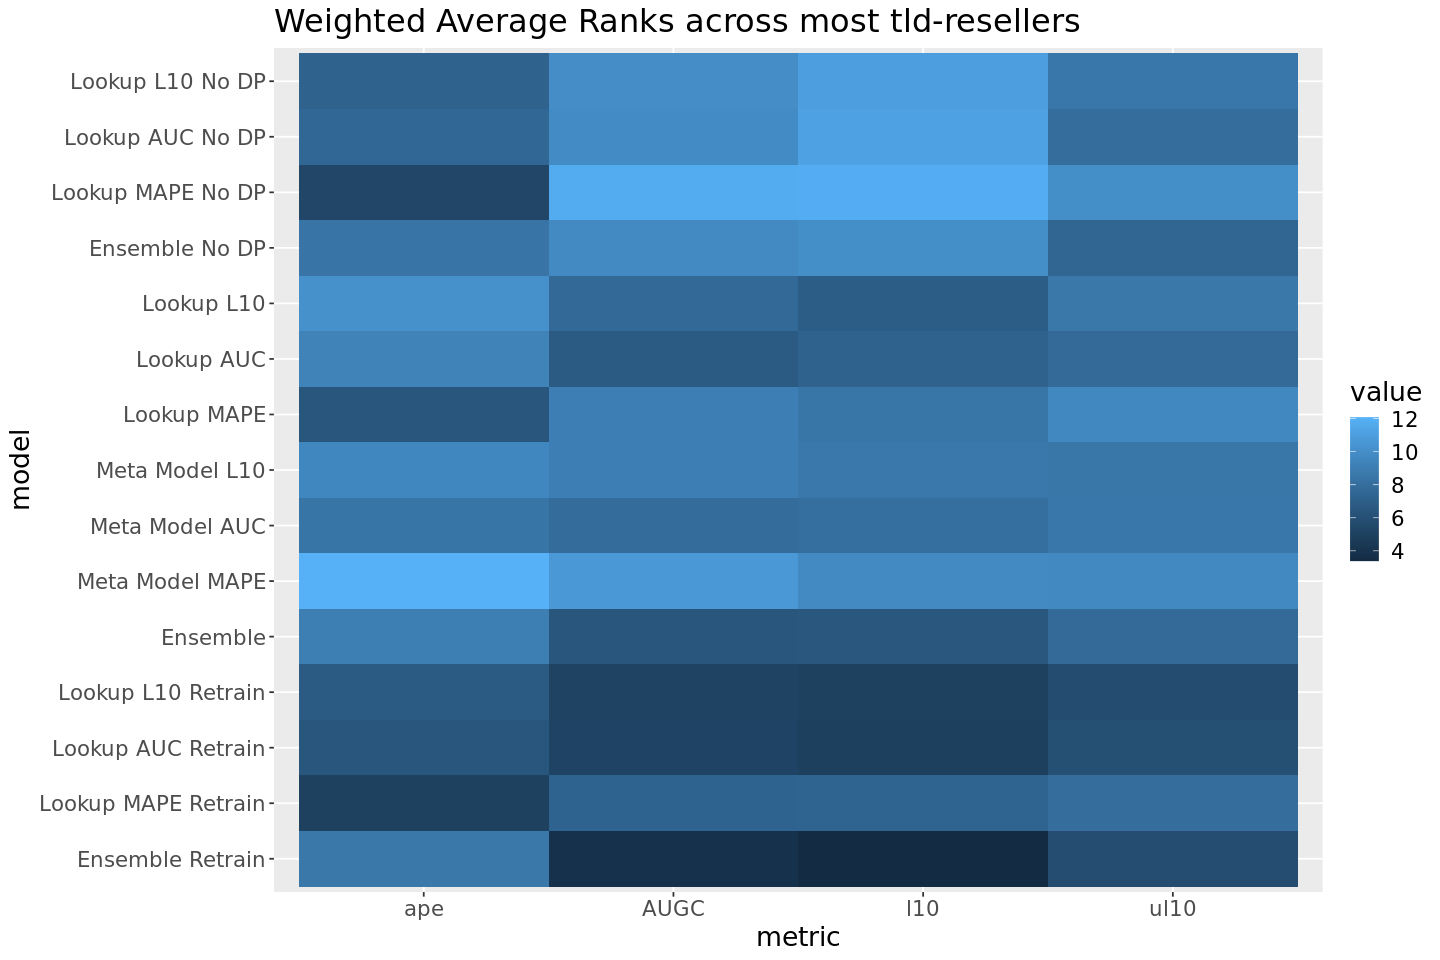

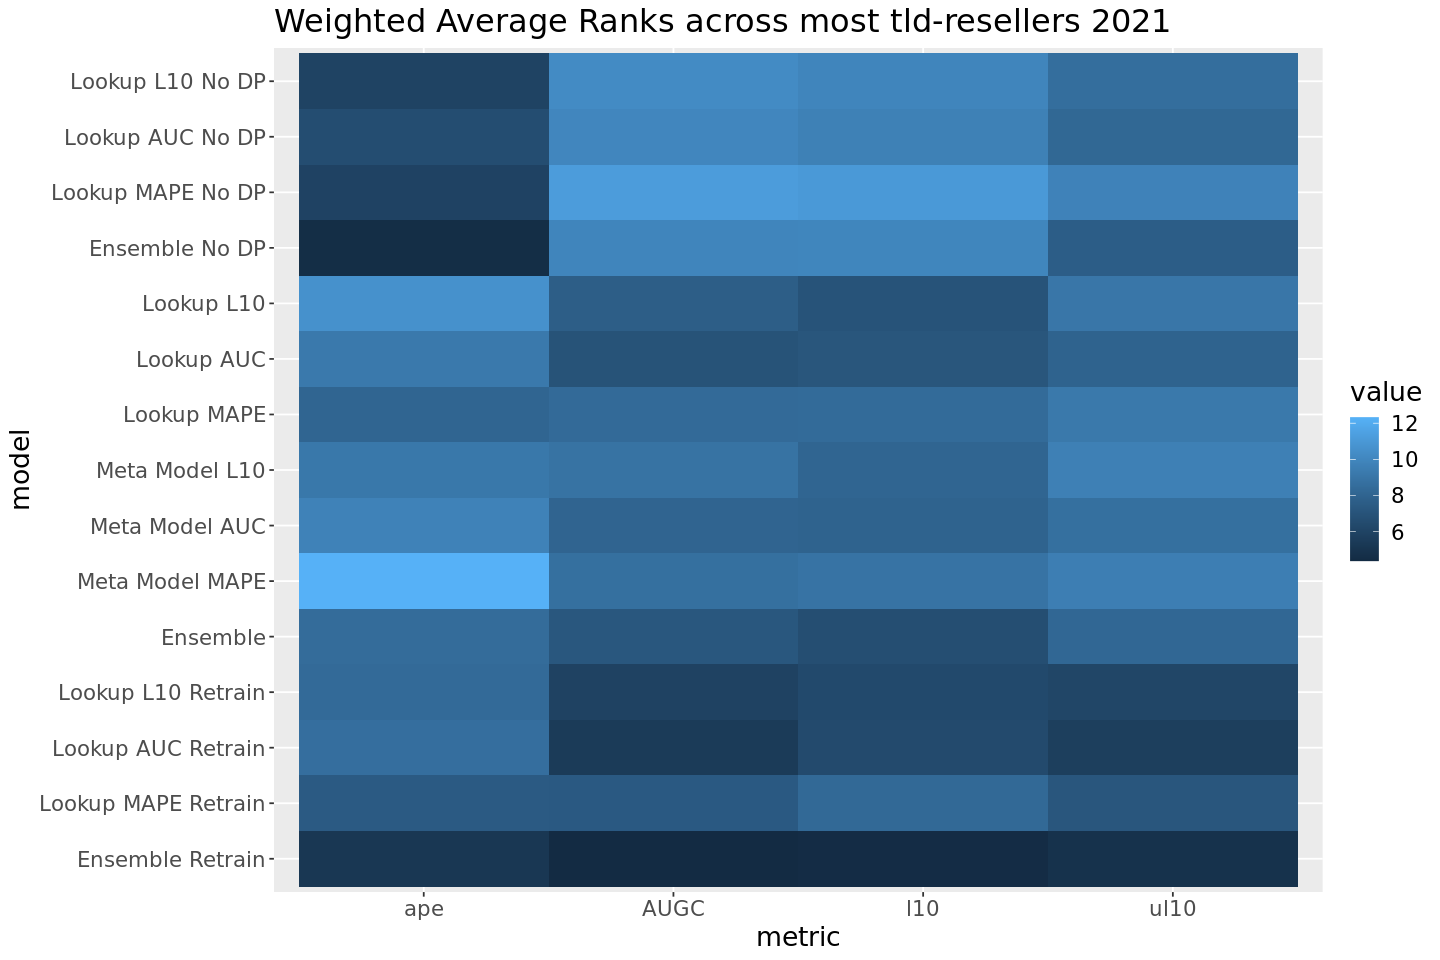

In [25]:
fig(12,8)

ranking_heatmap <- function(ranks, title_suf="") {
    ranks %>% rownames_to_column(var="model") %>% 
        mutate(model=factor(model, levels=name_order)) %>%
        pivot_longer(all_of(names(eval_func)), names_to="metric") %>%
        ggplot(aes(x=metric, y=model, fill=value)) + 
        geom_tile() + ggtitle(paste0("Weighted Average Ranks across most tld-resellers", title_suf)) + 
        theme(text=element_text(size=16))
}

ranking_heatmap(all_ranks)
ranking_heatmap(all_ranks_2021, title_suf=" 2021")



In [26]:
write.csv(all_ranks, file.path(fullDir, 'preds', 'all_ranks_w_no_dp.csv'))
write.csv(all_ranks_2021, file.path(fullDir, 'preds', 'all_ranks_w_no_dp_2021.csv'))

In [27]:
round(all_ranks, 2)

AUGC  l10   ul10  ape  
Ensemble No DP       9.75 10.04  7.49  8.36
Lookup L10 No DP     9.91 10.97  8.57  7.25
Lookup AUC No DP     9.77 11.15  7.99  7.53
Lookup MAPE No DP   11.76 11.85 10.02  5.33
Lookup L10 Retrain   5.10  4.95  5.75  6.69
Lookup AUC Retrain   5.14  4.89  5.93  6.42
Lookup MAPE Retrain  7.30  7.37  7.99  4.94
Ensemble Retrain     3.86  3.39  5.83  8.60
Lookup L10           7.68  6.89  8.60 10.09
Lookup AUC           6.72  7.18  7.75  9.29
Lookup MAPE          9.05  8.47  9.63  6.41
Meta Model L10       9.06  8.62  8.54  9.57
Meta Model AUC       7.90  8.05  8.52  8.45
Meta Model MAPE     10.58  9.72  9.68 12.08
Ensemble             6.43  6.45  7.73  8.99

In [28]:
round(all_ranks_2021, 2)

AUGC  l10   ul10 ape  
Ensemble No DP       9.92  9.93 7.58  4.55
Lookup L10 No DP    10.25  9.89 8.55  5.94
Lookup AUC No DP     9.97  9.66 8.19  6.60
Lookup MAPE No DP   11.19 11.04 9.76  5.92
Lookup L10 Retrain   5.90  6.34 6.14  8.36
Lookup AUC Retrain   5.42  6.42 5.67  8.60
Lookup MAPE Retrain  7.35  8.25 7.14  7.41
Ensemble Retrain     4.37  4.46 4.84  5.17
Lookup L10           7.62  6.98 9.04 10.56
Lookup AUC           6.94  7.12 7.93  9.24
Lookup MAPE          8.34  8.41 9.19  8.05
Meta Model L10       8.85  8.06 9.59  9.13
Meta Model AUC       8.01  7.92 8.66  9.72
Meta Model MAPE      8.67  8.87 9.53 12.32
Ensemble             7.21  6.65 8.18  8.44

In [33]:
for (name in names(preds)) {
    print(name)
    print(dim(preds[[name]]))
}

[1] "meta_retrain"
[1] 1050489      65
[1] "ensemble_retrain"
[1] 1050489      60
[1] "meta_normal"
[1] 919586     64
[1] "meta_model_normal"
[1] 919586     64
[1] "ensemble_normal"
[1] 919586     59


In [34]:
for (name in names(preds_2021)) {
    print(name)
    print(dim(preds_2021[[name]]))
}

[1] "meta_retrain"
[1] 2026492      65
[1] "ensemble_retrain"
[1] 2026492      60
[1] "meta_normal"
[1] 1814262      65
[1] "meta_model_normal"
[1] 1814262      65
[1] "ensemble_normal"
[1] 1814262      60


In [33]:
df = preds[["ensemble_no_dp"]]
head(df)

domain                domain_id renewed_count renewal_type expiry_date
1 immeo.tech            137308830 1             FirstTime    2020-10-25 
2 unitedlinesgroup.tech 137712590 1             FirstTime    2020-10-27 
3 torsbo.tech           137863570 1             FirstTime    2020-10-28 
4 bestform.tech         138683110 1             FirstTime    2020-10-31 
5 marouf.tech           139110540 1             FirstTime    2020-11-02 
6 fundland.tech         139203275 1             FirstTime    2020-11-03 
  creation_date creation_time       tld  registrar reseller ⋯ log_reg_arpt
1 2019-10-25    2019-10-25 02:23:49 tech CSL       CSL      ⋯ -9.210340   
2 2019-10-27    2019-10-27 13:19:15 tech CSL       CSL      ⋯ -9.210340   
3 2019-10-28    2019-10-28 22:31:39 tech CSL       CSL      ⋯ -9.210340   
4 2019-10-31    2019-10-31 09:32:31 tech CSL       CSL      ⋯ -9.210340   
5 2019-11-02    2019-11-02 11:28:55 tech CSL       CSL      ⋯  1.098612   
6 2019-11-03    2019-11-03 07:37:23 tech CSL       CSL      ⋯  1.098612   
  tld_registrar_index old_renewal_status pred_agg_rf_ALL pred_agg_glm_ALL
1 techcsl             Renewed            0.4265158       0.2729472       
2 techcsl             Not Renewd         0.2212203       0.2708477       
3 techcsl             Not Renewd         0.3891830       0.2737896       
4 techcsl             Not Renewd         0.4185100       0.2745165       
5 techcsl             Not Renewd         0.4049903       0.4311419       
6 techcsl             Not Renewd         0.1975350       0.4337556       
  pred_seg2_glm_ALL pred_seg_glm_ALL pred_seg_rf_ALL pred_seg2_rf_ALL
1 0.152             0.126            0.2212795       0.2217771       
2 0.136             0.110            0.2343748       0.1285073       
3 0.141             0.124            0.3036101       0.2550587       
4 0.129             0.121            0.2830703       0.2232495       
5 0.301             0.330            0.3087073       0.3326734       
6 0.260             0.323            0.2264545       0.1668000       
  pred_ensemble
1 0.2502292    
2 0.1311353    
3 0.2255069    
4 0.2402811    
5 0.4560779    
6 0.2783362

In [30]:
pred_cols

ERROR: Error in eval(expr, envir, enclos): object 'pred_cols' not found


In [19]:
names(preds_2021)

[1] "meta_retrain"      "ensemble_retrain"  "meta_normal"      
[4] "meta_model_normal" "ensemble_normal"

In [32]:
curr_name = "ensemble_retrain"
colMeans(is.na(preds_2021[[curr_name]][, names(preds_2021[[curr_name]])[grepl("^pred_", names(preds_2021[[curr_name]]))]]), na.rm=T)

pred_agg_rf_ALL  pred_agg_glm_ALL pred_seg2_glm_ALL  pred_seg_glm_ALL 
      0.000000000       0.000000000       0.109733470       0.104727776 
  pred_seg_rf_ALL  pred_seg2_rf_ALL     pred_ensemble 
      0.104727776       0.109733470       0.005005695

In [48]:
train2_preds <- read.csv(file.path(fullDir, "preds", "preds_train2.csv"))


In [51]:

colMeans(train2_preds[, names(train2_preds)[grepl("^pred_", names(train2_preds))]], na.rm=T)

pred_agg_rf_ALL  pred_agg_glm_ALL pred_seg2_glm_ALL  pred_seg_glm_ALL 
       0.11249372        0.09383951        0.10626470        0.08094264 
  pred_seg_rf_ALL  pred_seg2_rf_ALL 
       0.00000000        0.08084214

In [62]:
test <- read.csv(file.path(fullDir, "preds", "preds_train2_big.csv"))
# test_2021 <- read.csv(file.path(retrainDir_2021, "preds", "preds_test_2021_big.csv"))


In [63]:
colMeans(test[, names(test)[grepl("^pred_", names(test))]], na.rm=T)

pred_agg_rf_ALL  pred_agg_glm_ALL pred_seg2_glm_ALL  pred_seg_glm_ALL 
       0.10342218        0.08734593        0.11215706        0.08539827 
  pred_seg_rf_ALL  pred_seg2_rf_ALL 
       0.00000000        0.08532482

In [34]:
d1 = preds_2021[['ensemble_retrain']]
d2 = preds_2021[['meta_retrain']]


In [35]:
meta_pred_cols

[1] "pred_meta_l10"  "pred_meta_auc"  "pred_meta_mape"

In [36]:
length(unique(d1[, "domain"]))

[1] 1985309

In [ ]:
d = merge(d1, d2[[]])

In [59]:
test_2021_small <- read.csv(file.path(retrainDir_2021, "preds", "preds_test_2021_small.csv"))
colMeans(test_2021_small[, names(test_2021_small)[grepl("^pred_", names(test_2021_small))]], na.rm=T)

pred_agg_rf_ALL pred_agg_glm_ALL 
       0.2495170        0.2614055

## Investigating datapull

In [22]:
directory <- '/home/jupyter/Domains_202003/data/output/dp_datapull_20210818'
data <- readRDS(file.path(directory, "expiry_20210701_20210818_test.RDS"))
dim(data)

[1]  0 52

## Compare Lookup Tables

In [41]:
lookup_basic <- read.csv(file.path(fullDir, 'preds', 'lookup_table_train2.csv'))
lookup_meta <- read.csv(file.path(fullDir, 'preds', 'meta_model_lookup_table.csv'))

In [66]:
model_name_change <- data.frame(
    old_model=c('pred_seg2_rf_ALL', 'pred_seg2_glm_ALL', 'pred_seg_rf_ALL', 'pred_seg_glm_ALL', 'pred_agg_rf_ALL', 'pred_agg_glm_ALL'),
    best_model=c('RF tld-Reseller', 'GLM tld-Reseller', 'RF Reseller', 'GLM Reseller', 'RF All', 'GLM All')
)
rename_cols <- function(df) {
    colnames(df)[colnames(df) == "best_model"] = "old_model"
    df %>% left_join(model_name_change, by="old_model") %>%
        select(-old_model)
}
lookup_basic <- rename_cols(lookup_basic)
lookup_meta <- rename_cols(lookup_meta)


`summarise()` has grouped output by 'best_model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'best_model'. You can override using the `.groups` argument.



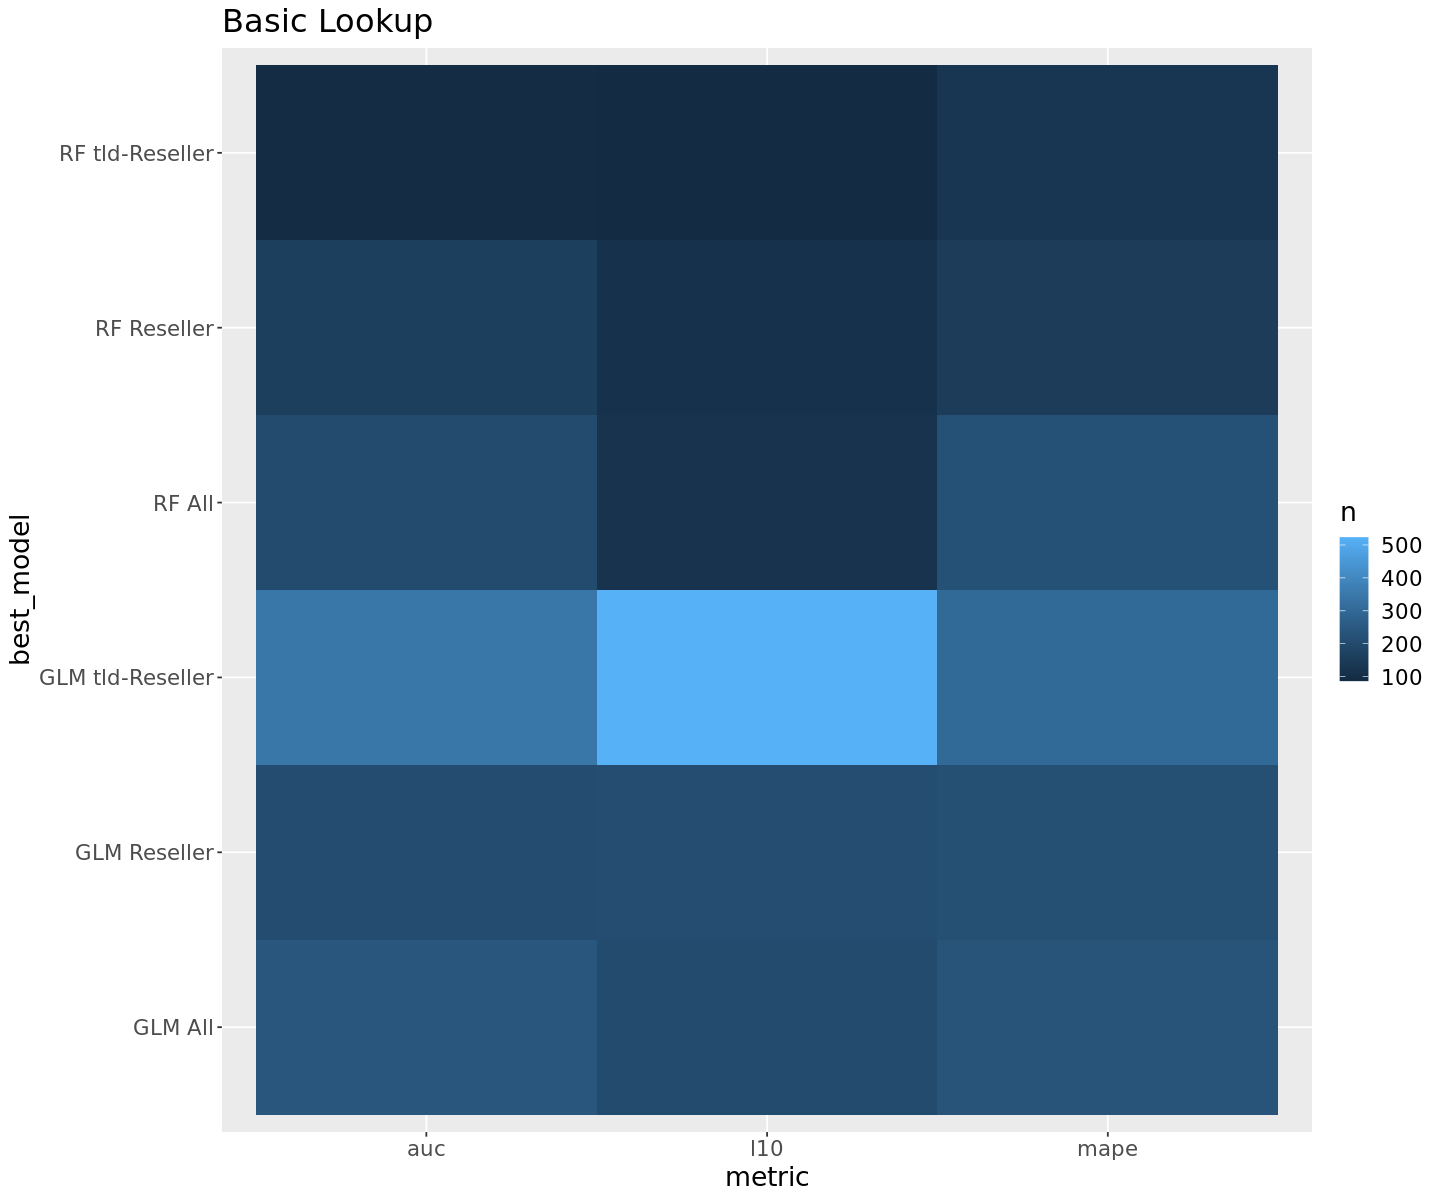

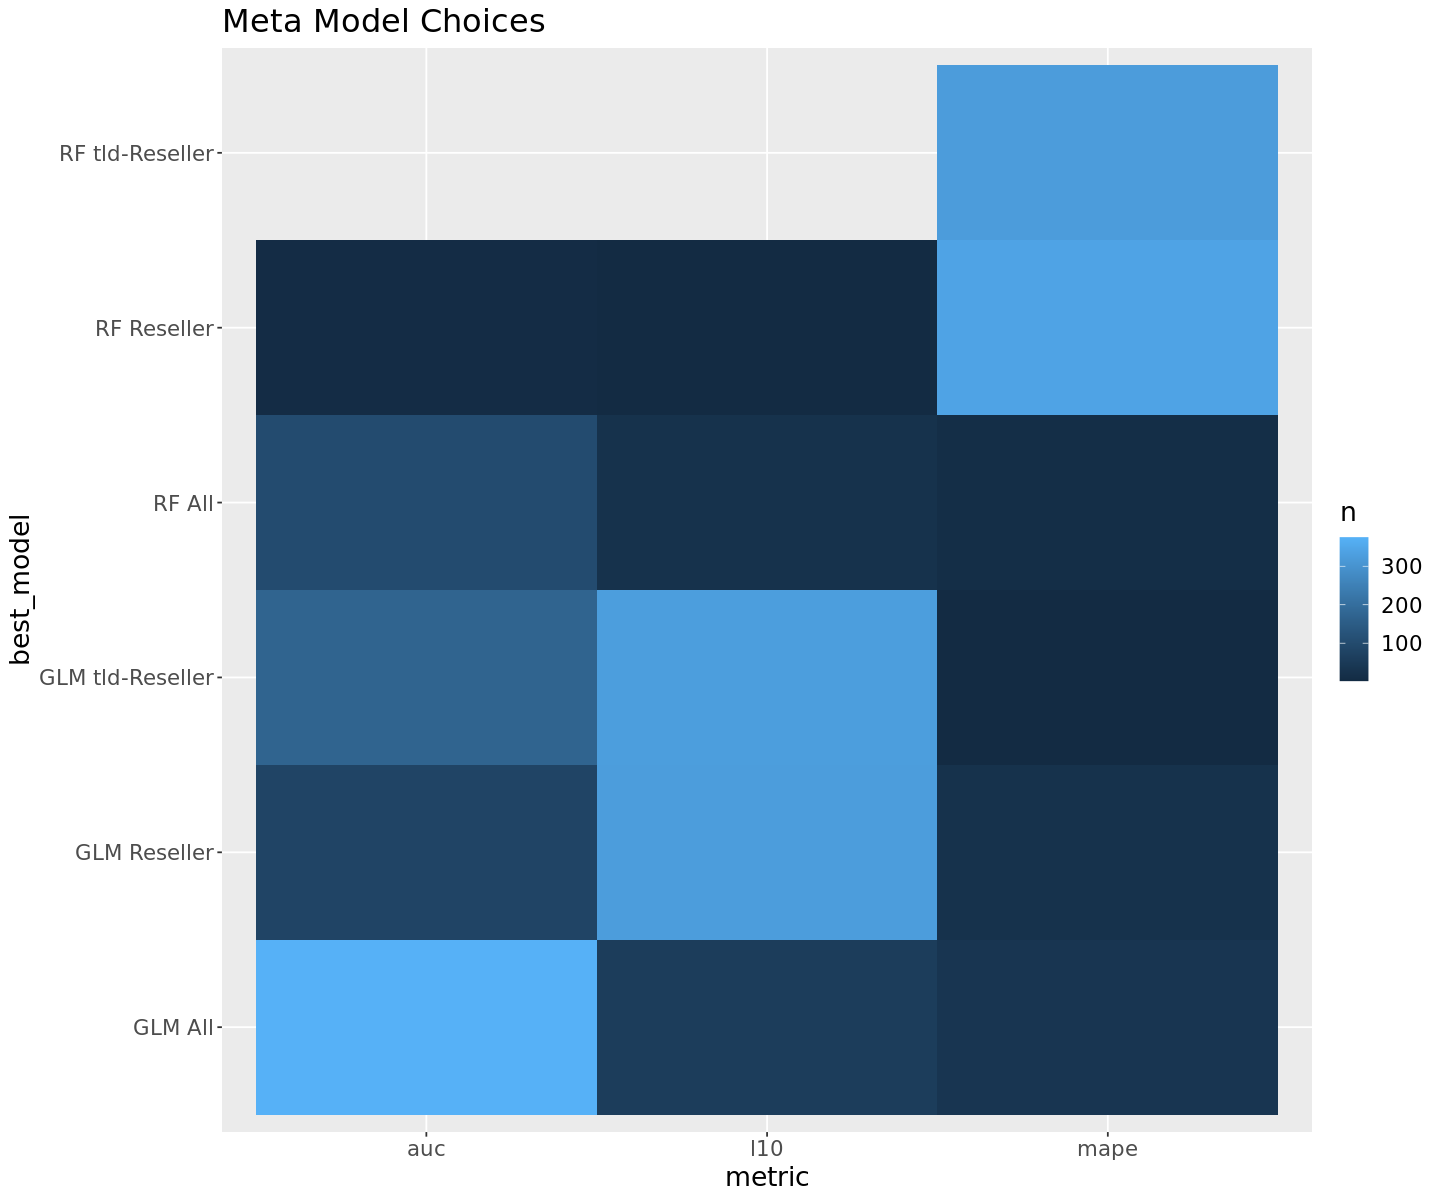

In [67]:
plot_lookup <- function(df, title="") {
    df %>% group_by(best_model, metric) %>%
        summarise(n=n()) %>%
        ggplot(aes(x=metric, y=best_model, fill=n)) +
        geom_tile() + ggtitle(title) +
        theme(text=element_text(size=16))
}


plot_lookup(lookup_basic, title="Basic Lookup")
plot_lookup(lookup_meta, "Meta Model Choices")

Joining, by = "tld_registrar_index"

`summarise()` has grouped output by 'best_model'. You can override using the `.groups` argument.

Joining, by = "tld_registrar_index"

`summarise()` has grouped output by 'best_model'. You can override using the `.groups` argument.



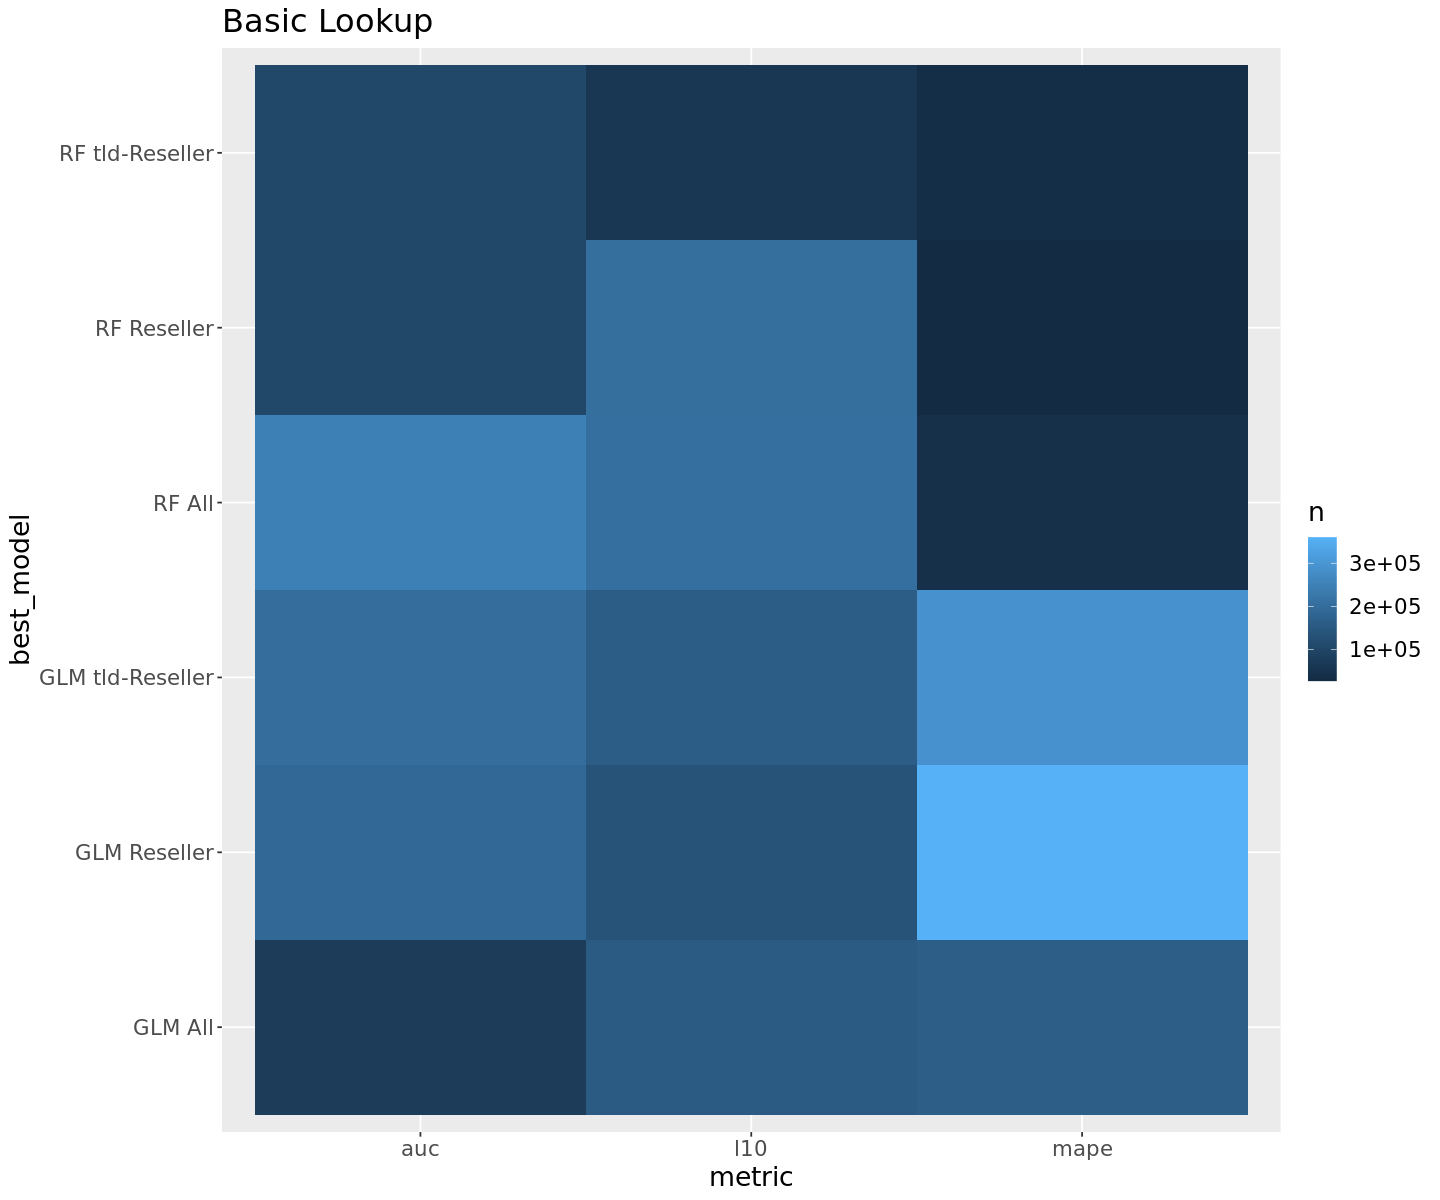

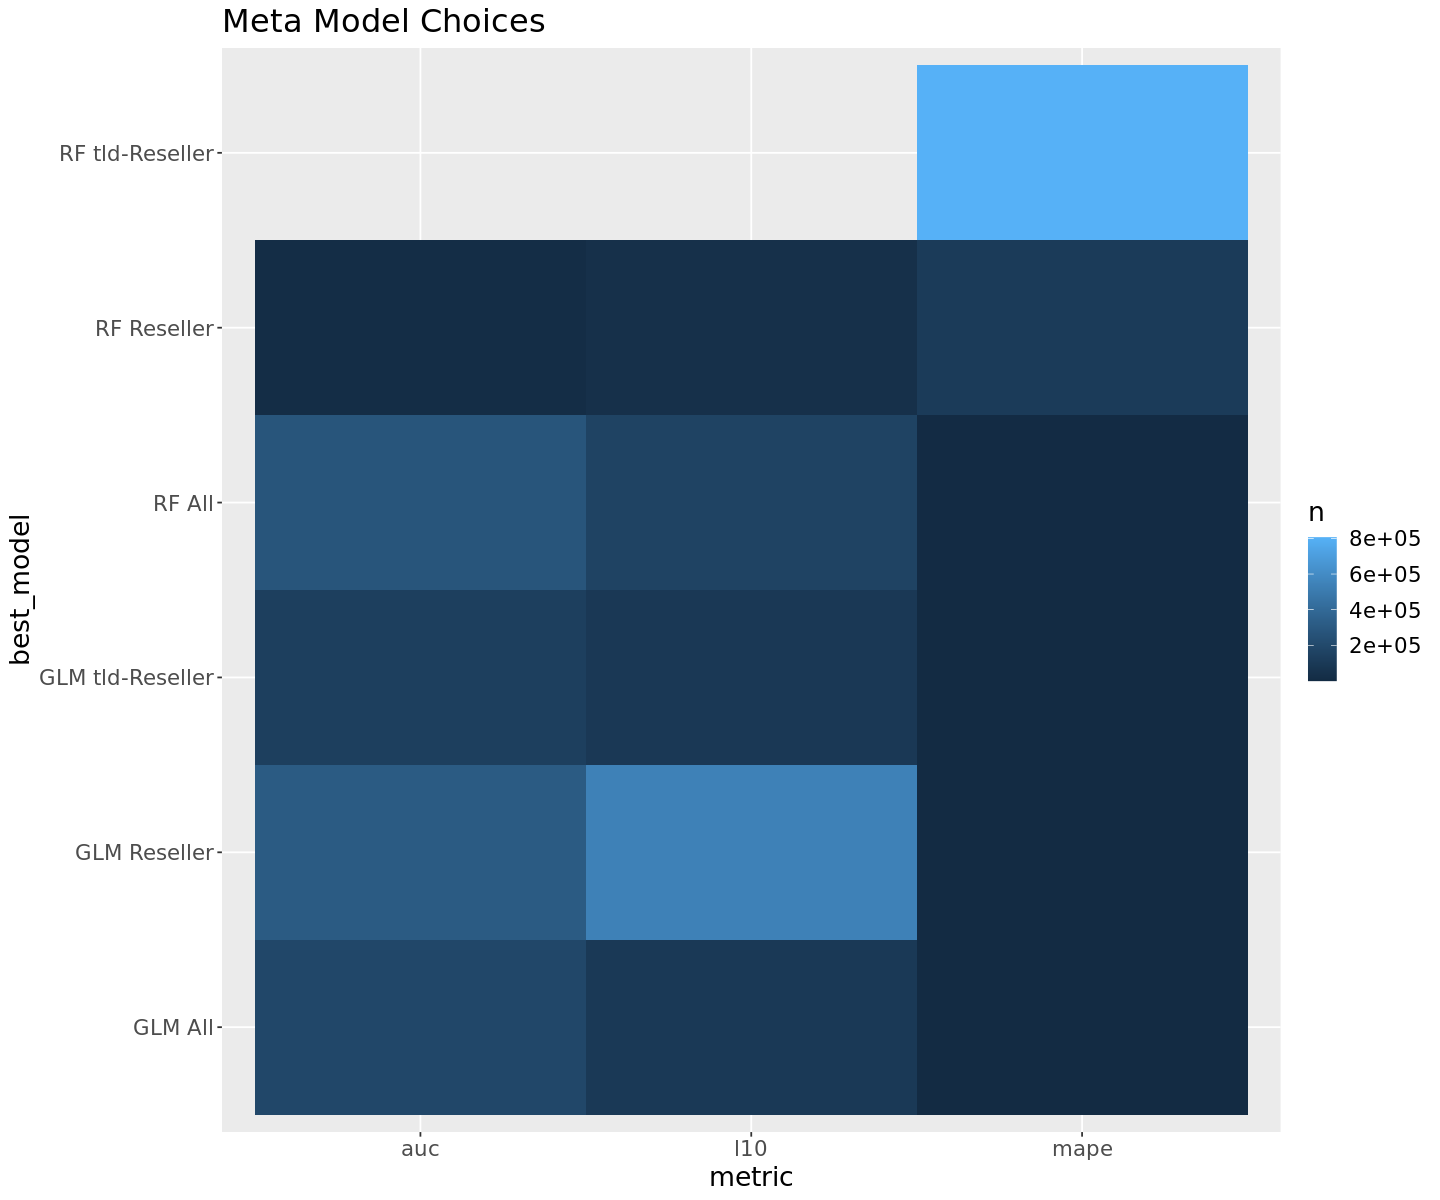

In [68]:
tld_registrar_counter = preds[['meta']] %>% group_by(tld_registrar_index) %>%
    summarise(n=n()) %>% select(tld_registrar_index, n)

plot_weighted_lookup <- function(df, title="") {
    df %>% left_join(tld_registrar_counter) %>%
        group_by(best_model, metric) %>%
        summarise(n=sum(n, na.rm=T)) %>%
        ggplot(aes(x=metric, y=best_model, fill=n)) +
        geom_tile() + ggtitle(title) +
        theme(text=element_text(size=16))
}
plot_weighted_lookup(lookup_basic, title="Basic Lookup")
plot_weighted_lookup(lookup_meta, "Meta Model Choices")

tld_registrar_index            metric best_model       
1    fun1&1 internet                l10    pred_seg2_glm_ALL
2    funactive 24                   l10    pred_seg2_glm_ALL
3    funalibaba                     l10    pred_seg2_glm_ALL
4    funalibaba sg                  l10    pred_agg_glm_ALL 
5    funautomattic                  l10    pred_seg2_glm_ALL
6    funaz.pl                       l10    pred_seg2_glm_ALL
7    funbeget                       l10    pred_agg_glm_ALL 
8    funbeon intermedia             l10    pred_seg2_glm_ALL
9    funbizcn                       l10    pred_seg2_glm_ALL
10   funchengdu west                l10    pred_seg2_glm_ALL
11   funcrazy domains               l10    pred_seg2_glm_ALL
12   funcronon ag                   l10    pred_seg2_glm_ALL
13   funcsl                         l10    pred_seg2_glm_ALL
14   fundomain.com - registrar      l10    pred_seg2_glm_ALL
15   fundonweb                      l10    pred_seg2_glm_ALL
16   fundotserve inc                l10    pred_seg2_glm_ALL
17   fundynadot                     l10    pred_agg_glm_ALL 
18   funenom                        l10    pred_seg_glm_ALL 
19   funeuro dns                    l10    pred_seg_glm_ALL 
20   funfbs                         l10    pred_seg_glm_ALL 
21   fungabia                       l10    pred_seg2_glm_ALL
22   fungandi sas                   l10    pred_seg2_glm_ALL
23   funglobal domains              l10    pred_seg2_glm_ALL
24   fungmo                         l10    pred_agg_glm_ALL 
25   fungo daddy                    l10    pred_agg_rf_ALL  
26   fungoogle                      l10    pred_seg_glm_ALL 
27   funhome.pl                     l10    pred_seg_glm_ALL 
28   funhosting ukraine             l10    pred_seg_glm_ALL 
29   funhostinger                   l10    pred_seg_glm_ALL 
30   funhostnet.nl                  l10    pred_seg_glm_ALL 
⋮    ⋮                              ⋮      ⋮                
2167 websitepdr china               mape   pred_seg_rf_ALL  
2168 websitepdr ltd                 mape   pred_seg_rf_ALL  
2169 websiteporkbun                 mape   pred_seg2_rf_ALL 
2170 websiterealtime register       mape   pred_seg2_rf_ALL 
2171 websitereg.ru                  mape   pred_seg2_rf_ALL 
2172 websiteregister.it             mape   pred_seg2_rf_ALL 
2173 websiteregway                  mape   pred_seg2_rf_ALL 
2174 websiteru-center               mape   pred_seg_rf_ALL  
2175 websiterumahweb                mape   pred_seg2_rf_ALL 
2176 websitesered                   mape   pred_seg_rf_ALL  
2177 websiteshanghai meicheng       mape   pred_seg2_rf_ALL 
2178 websiteshopify                 mape   pred_seg_rf_ALL  
2179 websitesoluciones corporativas mape   pred_seg2_rf_ALL 
2180 websitespaceweb                mape   pred_seg2_rf_ALL 
2181 websitesquarespace             mape   pred_seg_rf_ALL  
2182 websitesuperhosting            mape   pred_seg_rf_ALL  
2183 websitetenten                  mape   pred_seg_rf_ALL  
2184 websitetld registrar solns     mape   pred_seg_rf_ALL  
2185 websitetucows                  mape   pred_seg_rf_ALL  
2186 websiteuniregistrar            mape   pred_seg2_rf_ALL 
2187 websiteunited domains          mape   pred_seg2_rf_ALL 
2188 websiteuol                     mape   pred_seg_rf_ALL  
2189 websiteurl solutions           mape   pred_seg2_rf_ALL 
2190 websitevalue domain            mape   pred_seg2_rf_ALL 
2191 websiteversio                  mape   pred_seg_rf_ALL  
2192 websitewest263 international   mape   pred_seg2_rf_ALL 
2193 websitewhois                   mape   pred_seg2_rf_ALL 
2194 websitewix                     mape   pred_seg2_glm_ALL
2195 websitexiamen chinasource      mape   pred_seg_rf_ALL  
2196 websitexin net                 mape   pred_seg_rf_ALL

## Global Evaluation

In [3]:
pred_cols <- names(meta_preds)[grepl( "^pred_" , names(meta_preds))]
pred_cols

[1] "pred_agg_rf_ALL"   "pred_agg_glm_ALL"  "pred_seg2_glm_ALL"
[4] "pred_seg_glm_ALL"  "pred_seg_rf_ALL"   "pred_seg2_rf_ALL" 
[7] "pred_meta_l10"     "pred_meta_auc"     "pred_meta_mape"

In [8]:
eval_func <- list()
eval_func[['AUGC']] <- augc_vec
eval_func[['l10']] <- l10_vec
eval_func[['pe']] <- pe_vec

global_eval <- function(df, eval_func, pred_cols) {
    all_vals <- list()
    for (metric in names(eval_func)) {
        vals <- c()
        for (col in pred_cols) {
            curr_val <- eval_func[[metric]](df[, col], df[, "renewal_status"])
            vals <- c(vals, curr_val)
        }
        all_vals[[metric]] <- vals
    }
    metrics <- data.frame(all_vals, row.names=pred_cols)
    metrics
}
metrics <- global_eval(meta_preds, eval_func, pred_cols)
metrics

AUGC      l10      pe      
pred_agg_rf_ALL   0.8468608 5.215497 43.30068
pred_agg_glm_ALL  0.8399861 4.957371 20.02284
pred_seg2_glm_ALL 0.7987966 4.304250 55.31407
pred_seg_glm_ALL  0.8293611 5.120797 19.44434
pred_seg_rf_ALL   0.8366725 5.021428 58.69169
pred_seg2_rf_ALL  0.8212023 4.483082 65.33903
pred_meta_l10     0.8368851 5.127558 40.22311
pred_meta_auc     0.8435307 5.224166 37.23896
pred_meta_mape    0.8387480 5.109762 13.62974

In [9]:
eval_funcs <- list(
    AUGC=augc_vec,
    l10=l10_vec,
    ape=ape_vec
)
metric_lookup <- list(
    AUGC="Area under Gains Curve",
    l10="Lift at Ten Percent",
    pe="Percentage Error",
    ape="Absolute Percentage Error"
)

In [10]:
interactive_heatmap <- function(df, x_col, y_col, eval_key, pred_col='preds', use_plotly=FALSE) {
    
    eval_func <- eval_funcs[[eval_key]]
    eval_name <- metric_lookup[[eval_key]]
    scores <- c()
    x_vals <- c()
    y_vals <- c()
    unique_vals <- list()
    cols <- c(x_col, y_col)
    for (col in cols) {
        if (col %in% names(df)) {
            df[, col] <- as.character(df[, col])
            unique_vals[[col]] <- unique(df[, col])
        } else if (col == "eval_mets") {
            unique_vals[[col]] <- c("ape", "l10", "AUGC")
        } else {
            print(paste0("Unsupported column ", col))
        }
    }
    ns <- c()

    for (x_val in unique_vals[[x_col]]) {
        for (y_val in unique_vals[[y_col]]) {
            mask <- rep(T, nrow(df))
            for (i in 1:2) {
                col <- cols[i]
                val <- c(x_val, y_val)[i]
                if (col %in% names(df)) {
                    mask <- mask & (df[, col] == val)
                } else if (col == "eval_mets") {
                    eval_func <- eval_funcs[[val]]
                    eval_name <- "Comparing Performance"                    
                }
            }
            x_vals <- c(x_vals, x_val)
            y_vals <- c(y_vals, y_val)
            score <- eval_func(df[mask, pred_col], df[mask, "renewal_status"])
            if (is.na(score)) score = 0
            if (score == 0) score = NA
            scores <- c(scores, score)
            ns <- c(ns, sum(mask))
        }
    }
    tmp <- data.frame(score=scores, n=ns)
    tmp[, x_col] <- x_vals
    tmp[, y_col] <- y_vals
    if ("eval_mets" %in% cols) {
        tmp <- ddply(tmp, .(eval_mets), transform, rescale = scale(score))
        tmp[tmp$eval_mets == "ape", "rescale"] = 1 - tmp[tmp$eval_mets == "ape", "rescale"]
        p <- ggplot(tmp, aes_string(x=x_col, y=y_col, fill="rescale", text="score")) + 
            geom_tile() + ggtitle(eval_name)
    } else {
        if (use_plotly) {
            tmp[, "rescale"] <- tmp[, "score"]
            if (eval_key == "ape") {
                tmp$rescale <- max(tmp$rescale, na.rm=T) - tmp$rescale
            }
            p <- ggplot(tmp, aes_string(x=x_col, y=y_col, fill="rescale", text="score")) + 
                geom_tile() + ggtitle(eval_name)
        } else {
            p <- ggplot(tmp, aes_string(x=x_col, y=y_col, fill="score")) + 
                geom_tile() + ggtitle(eval_name)            
        }
    }
    if (use_plotly) return(ggplotly(p, tooltip=c("score", x_col, y_col)))
    p
}


meta_long <- meta_preds %>% 
    pivot_longer(all_of(pred_cols), names_to="model", values_to="preds") %>%
    data.frame(stringsAsFactors=F)

## Comparing model Performance

In [11]:
compare_model_metrics <- function(eval_key, only_meta=FALSE, tlds=c('online', 'store', 'site', 'tech', 'space'),
                          resellers=c('NameCheap', 'Go Daddy', 'Alibaba', 'GMO')) {
    if (only_meta) use_pred <- c('pred_meta_mape', 'pred_meta_auc', 'pred_meta_l10')
    else use_pred = names(meta_preds)[grepl( "^pred_" , names(meta_preds))]
    c <- expand.grid(tld=tlds, reseller=resellers)
    tld_registrar_indices <- tolower(paste0(c$tld, c$reseller))
    mask <- (meta_long$tld_registrar_index %in% tld_registrar_indices) & (meta_long$model %in% use_pred)
    
    interactive_heatmap(meta_long[mask, ], x_col='tld', y_col='model', eval_key=eval_key)
}
fig(10,6)


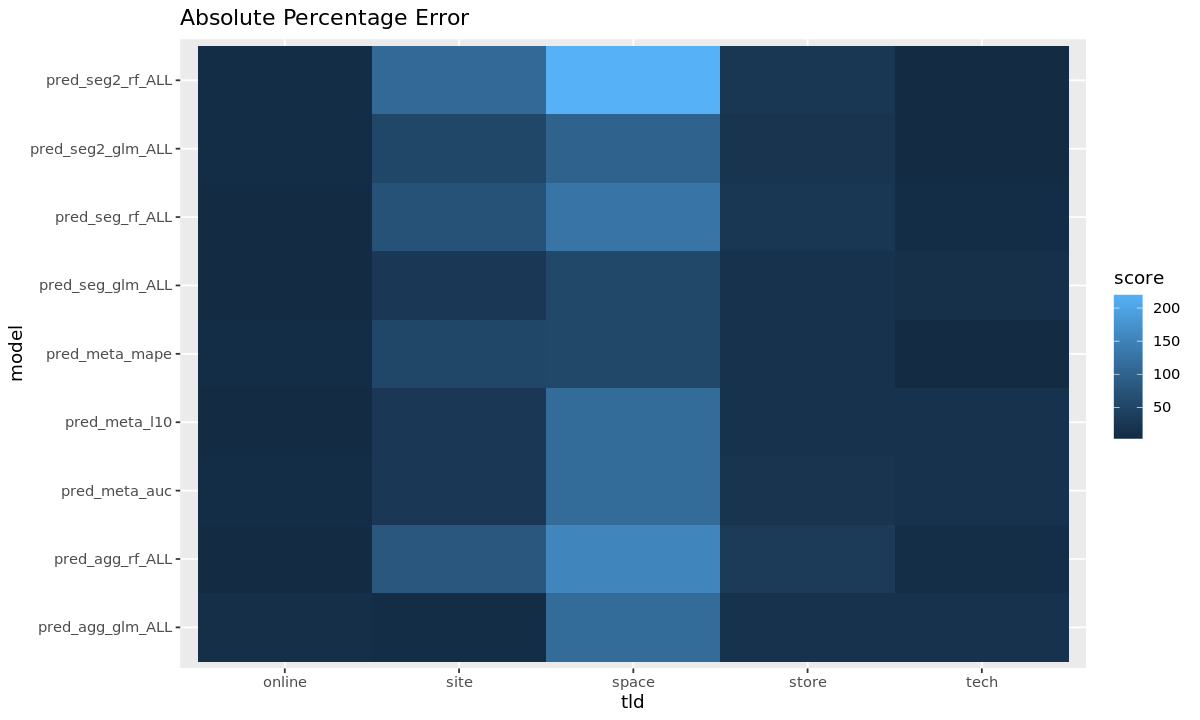

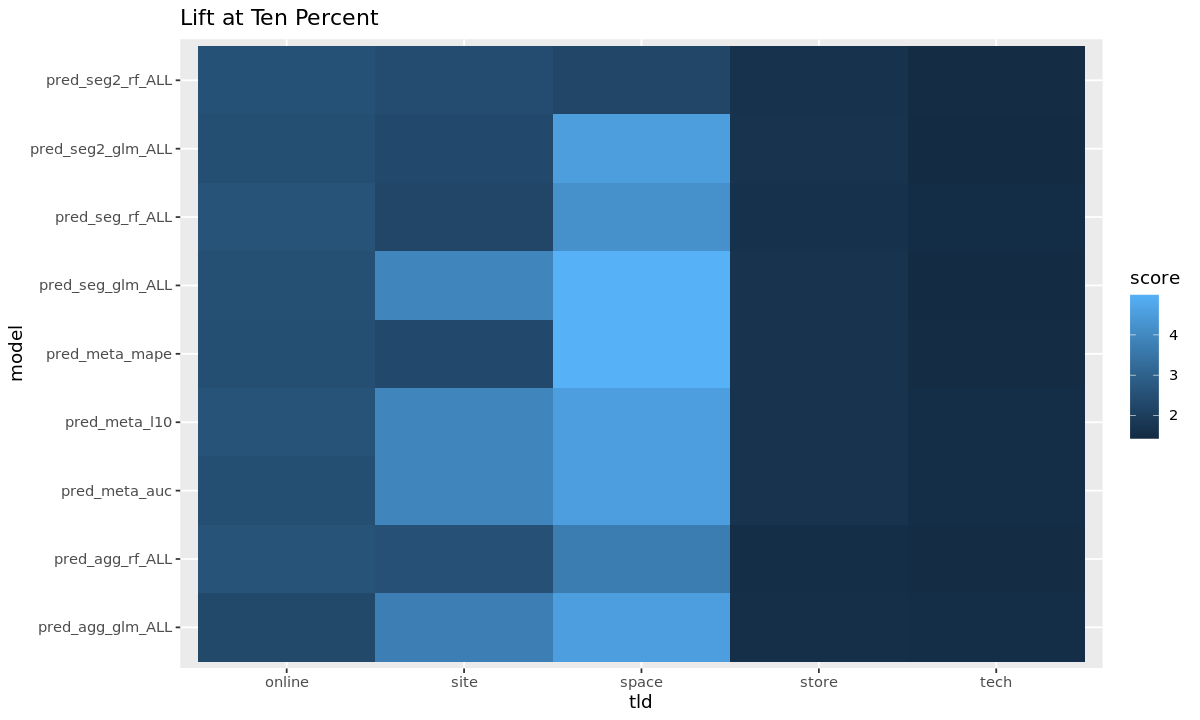

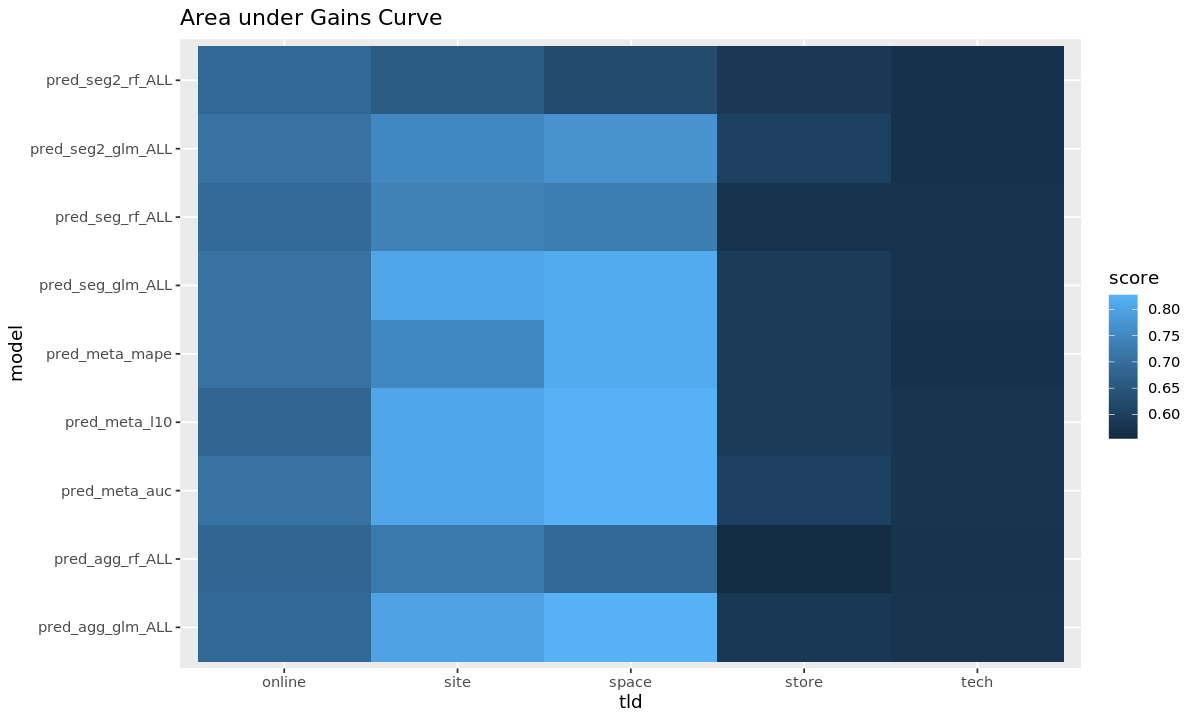

In [12]:
reseller = 'Go Daddy'

compare_model_metrics('ape', resellers=c(reseller))
compare_model_metrics('l10', resellers=c(reseller))
compare_model_metrics('AUGC', resellers=c(reseller))

In [13]:
lookup <- read.csv(paste0(fullDir, '/preds/lookup_table_train2.csv'))
head(lookup)

tld_registrar_index best_model        metric
1 fun1&1 internet     pred_agg_glm_ALL  l10   
2 fun101 domain       pred_seg2_glm_ALL l10   
3 fun10dencehispahard pred_seg2_glm_ALL l10   
4 fun1api             pred_agg_glm_ALL  l10   
5 funab name isp      pred_seg2_glm_ALL l10   
6 funactive 24        pred_seg_glm_ALL  l10

In [14]:
table(lookup$best_model, lookup$metric)

                   
                    auc l10 mape
  pred_agg_glm_ALL  240 201  231
  pred_agg_rf_ALL   202 115  221
  pred_seg_glm_ALL  205 209  215
  pred_seg_rf_ALL   161 111  150
  pred_seg2_glm_ALL 345 523  303
  pred_seg2_rf_ALL   93  87  126

`summarise()` has grouped output by 'best_model'. You can override using the `.groups` argument.



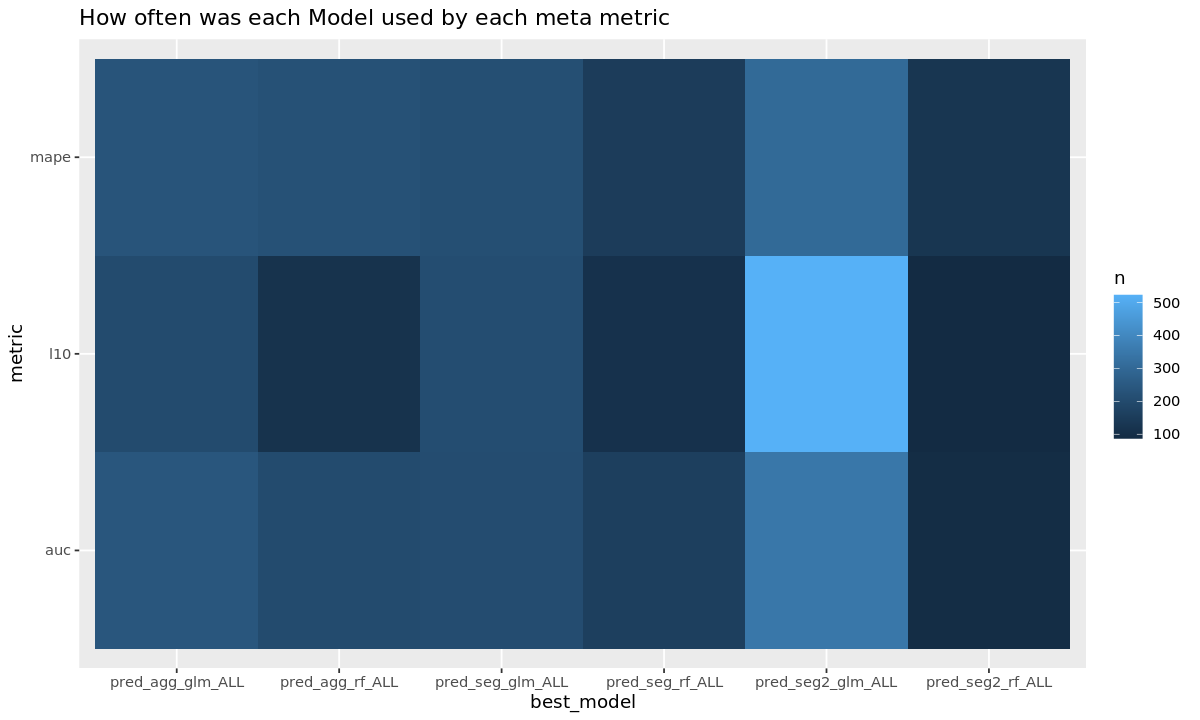

In [17]:
lookup %>%
    group_by(best_model, metric) %>%
    summarise(n=n()) %>%
    ggplot(aes(x=best_model, y=metric, fill=n)) +
    geom_tile() + ggtitle("How often was each Model used by each meta metric")

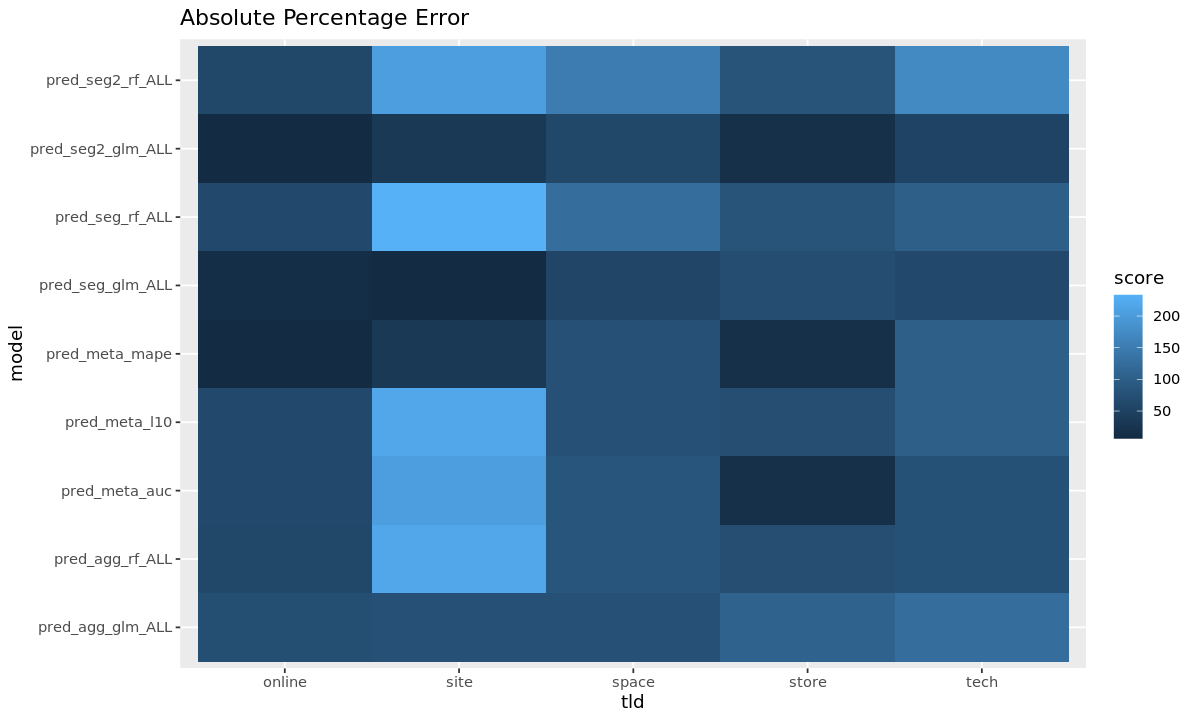

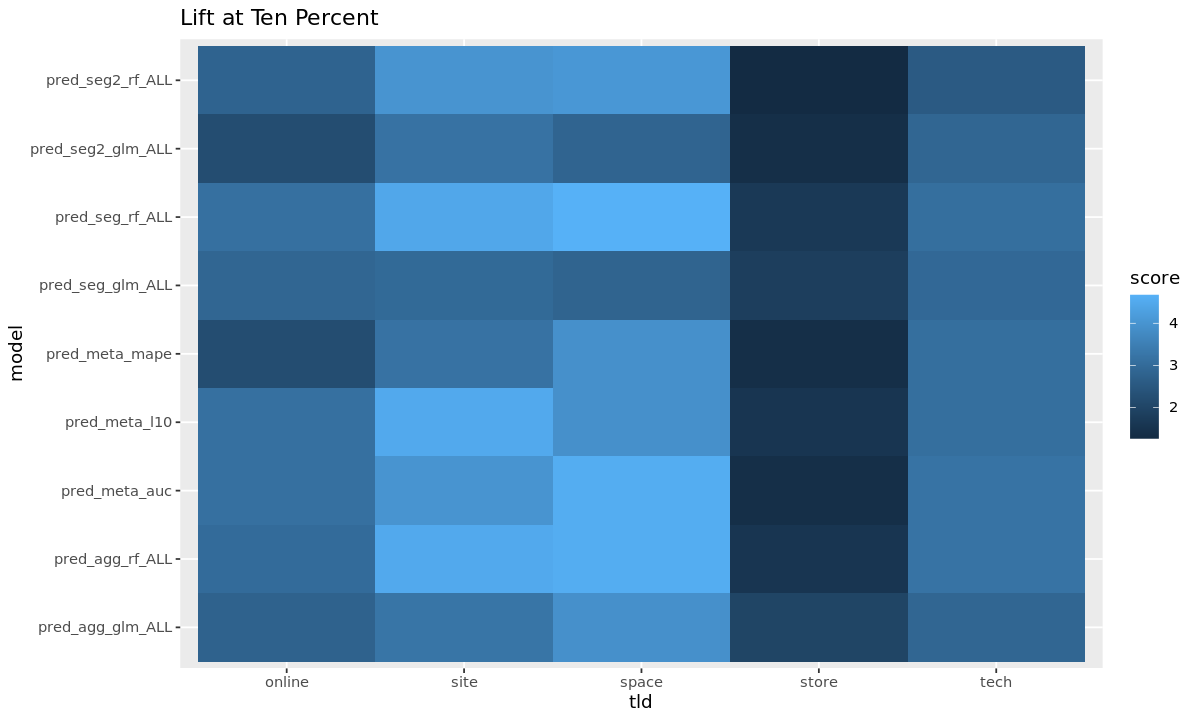

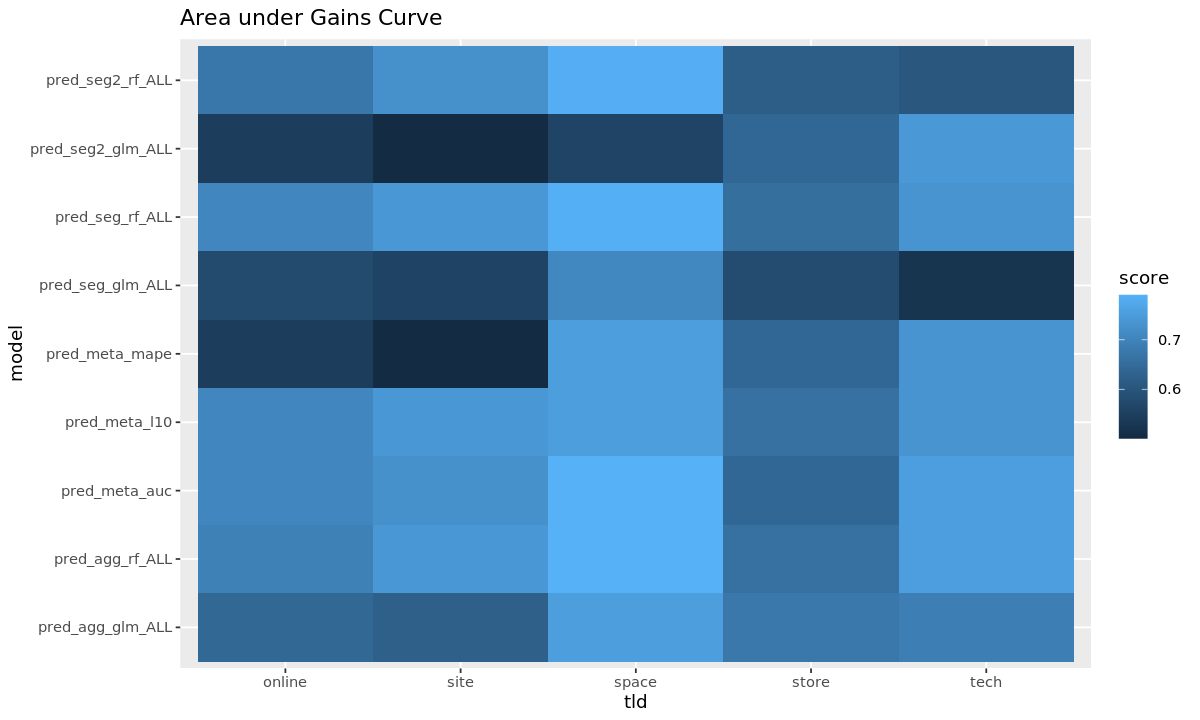

In [18]:
reseller = 'Namecheap'

compare_model_metrics('ape', resellers=c(reseller))
compare_model_metrics('l10', resellers=c(reseller))
compare_model_metrics('AUGC', resellers=c(reseller))

In [21]:
compare_model_pred_heatmap <- function(tlds, resellers, only_meta=FALSE) {
    if (only_meta) use_pred <- c('pred_meta_mape', 'pred_meta_auc', 'pred_meta_l10')
    else use_pred = names(meta_preds)[grepl( "^pred_" , names(meta_preds))]
    c <- expand.grid(tld=tlds, reseller=resellers)
    tld_registrar_indices <- tolower(paste0(c$tld, c$reseller))
    use_pred = names(meta_preds)[grepl( "^pred_" , names(meta_preds))]
    mask <- (meta_long$tld_registrar_index %in% tld_registrar_indices) & (meta_long$model %in% use_pred)
    interactive_heatmap(meta_long[mask, ], 'model', 'eval_mets', eval_key='l10')
}
tlds=c('online', 'store', 'site', 'tech', 'space')


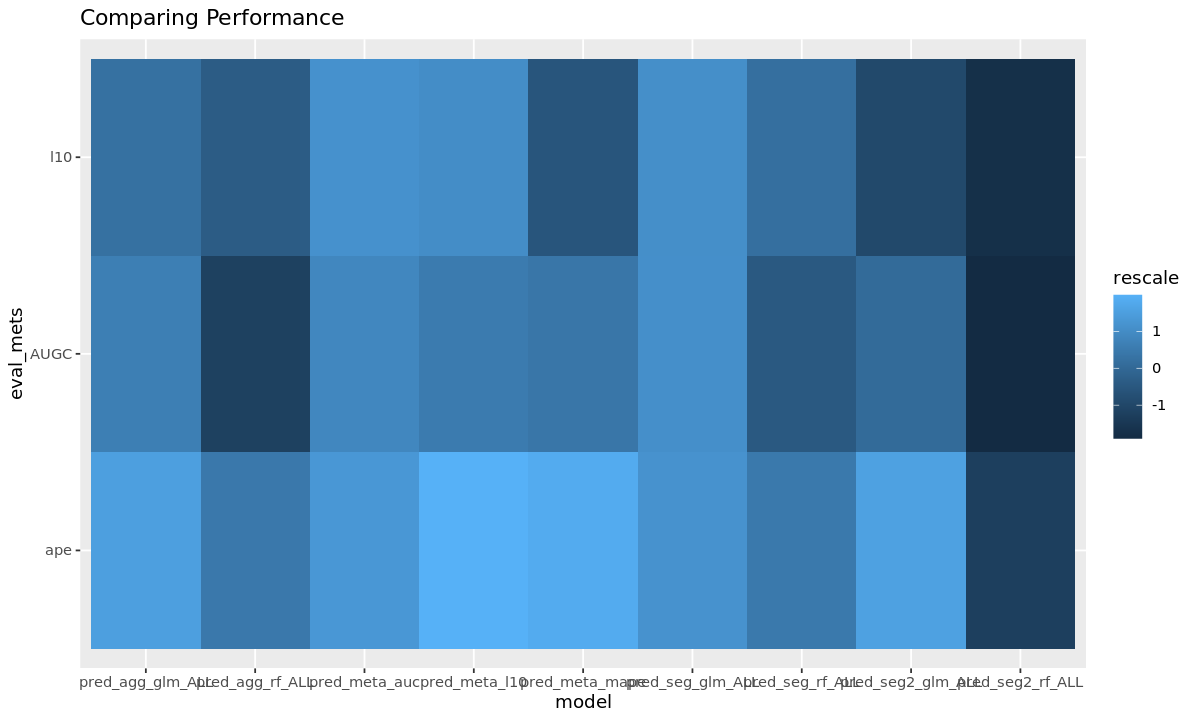

In [22]:
reseller = 'Go Daddy'

compare_model_pred_heatmap(tlds, c(reseller))

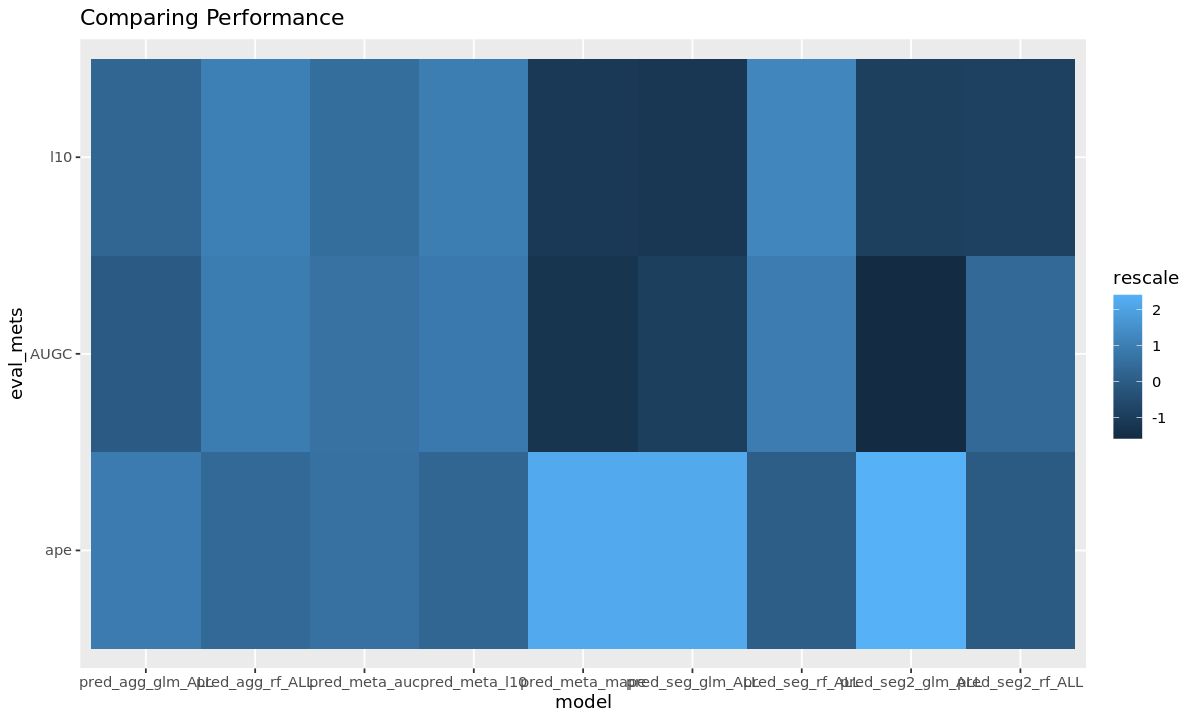

In [23]:
reseller = 'Namecheap'

compare_model_pred_heatmap(tlds, c(reseller))

## Comparing Tld-Reseller Performance

In [24]:
plot_tld_reseller_heatmap <- function(pred_cols, eval_met, tlds=c('online', 'store', 'site', 'tech', 'space'),
                          resellers=c('NameCheap', 'Go Daddy', 'Alibaba', 'GMO')) {
    c <- expand.grid(tld=tlds, reseller=resellers)
    tld_registrar_indices <- tolower(paste0(c$tld, c$reseller))
    mask <- (meta_long$tld_registrar_index %in% tld_registrar_indices) & (meta_long$model %in% pred_cols)
    interactive_heatmap(meta_long[mask,], 'tld', 'reseller', eval_met)    
}


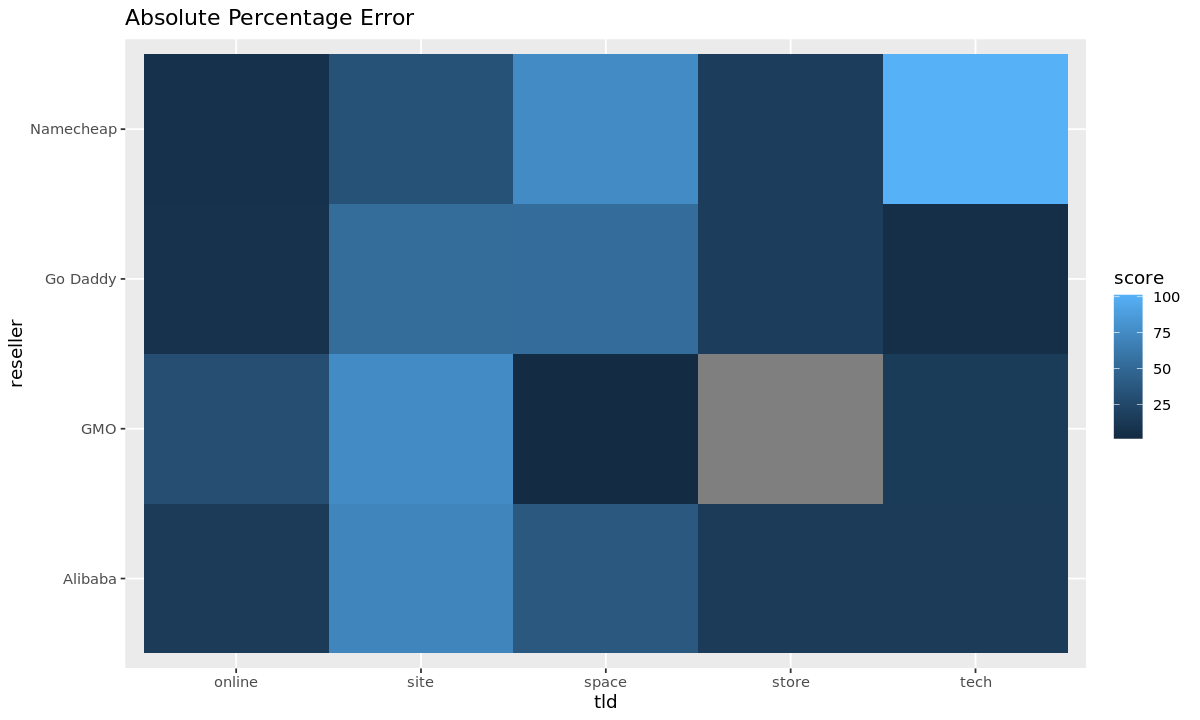

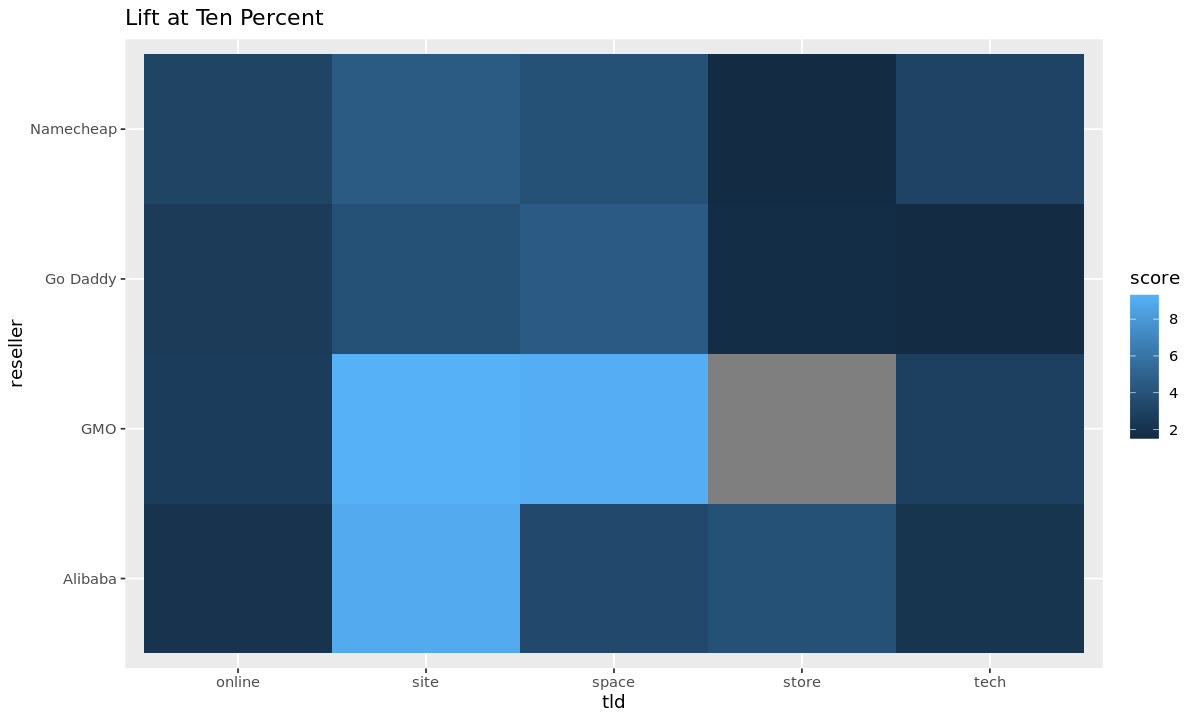

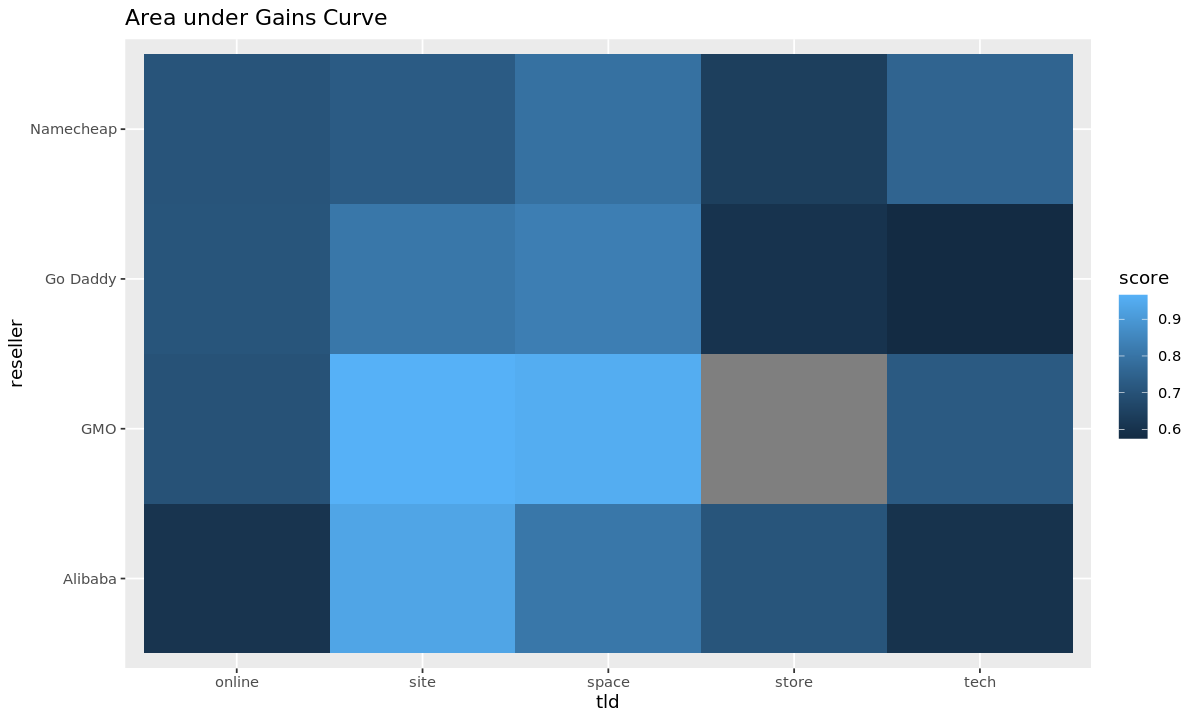

In [25]:
plot_tld_reseller_heatmap(c('pred_meta_mape'), 'ape')
plot_tld_reseller_heatmap(c('pred_meta_l10'), 'l10')
plot_tld_reseller_heatmap(c('pred_meta_auc'), 'AUGC')

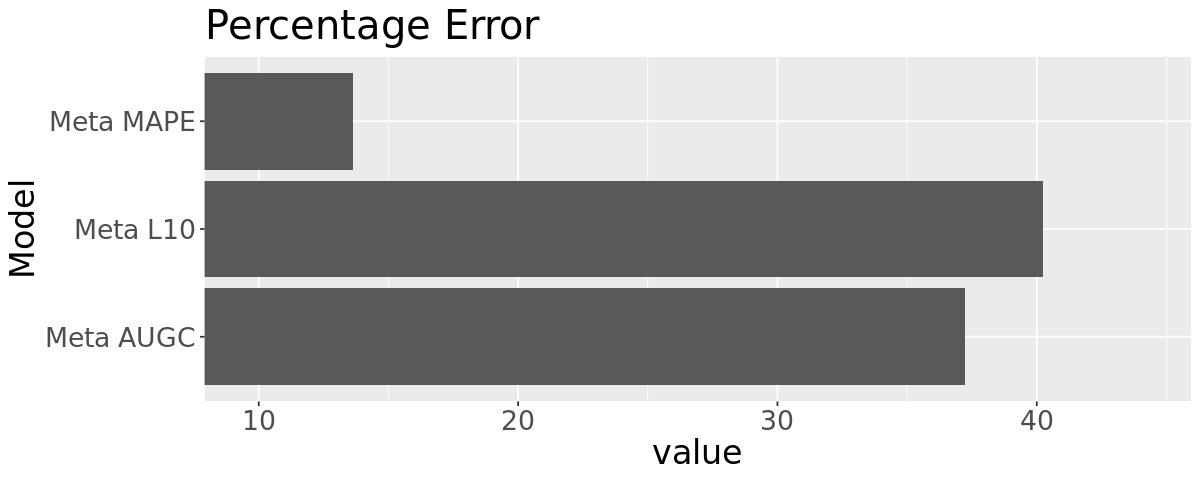

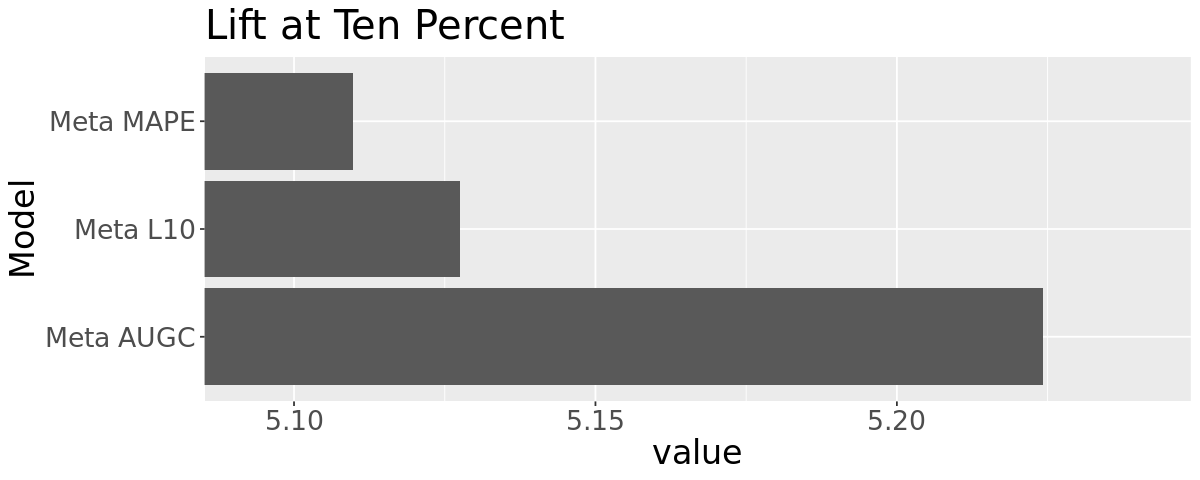

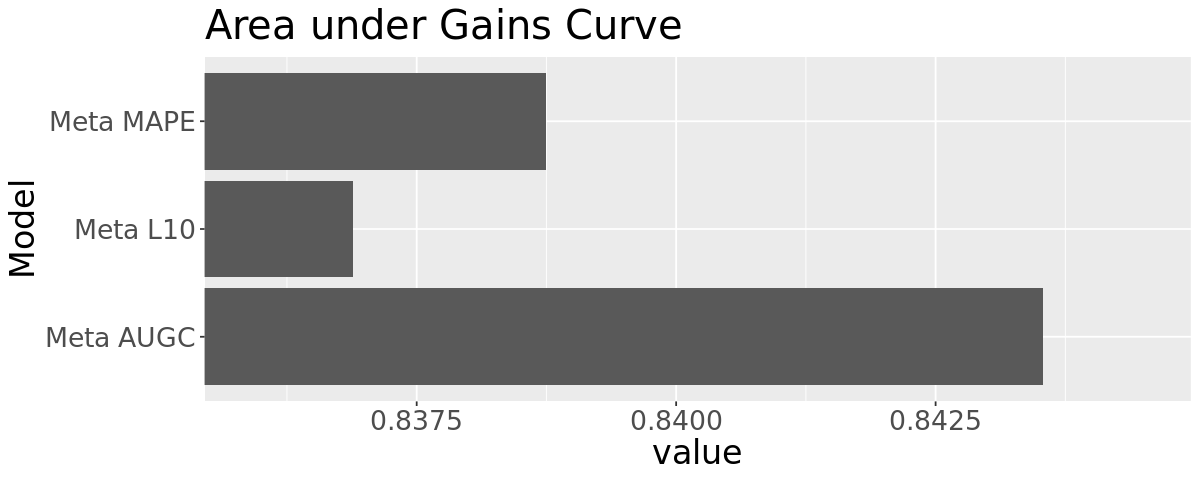

In [26]:
library(ggplot2)


plot_metrics <- function(metrics, met, rel_pred_cols=c('pred_meta_l10', 'pred_meta_auc', 'pred_meta_mape'), title_pref = "") {
    fig(10, 4)
    model_lookup <- data.frame(
    model_key = c('pred_agg_rf_ALL', 'pred_agg_glm_ALL', 'pred_seg2_glm_ALL', 'pred_seg_glm_ALL', 
                  'pred_seg_rf_ALL', 'pred_seg2_rf_ALL', 'pred_meta_l10', 'pred_meta_auc', 'pred_meta_mape'),
    Model = c("RF All", "GLM All", "GLM Tld-Reseller", "GLM Reseller", "RF Reseller", "RF Tld-Reseller",
              "Meta L10", "Meta AUGC", "Meta MAPE"), stringsAsFactors=FALSE
    )

    metric_lookup <- list(
        AUGC="Area under Gains Curve",
        l10="Lift at Ten Percent",
        pe="Percentage Error"
    )
    
    # Set axes limits
    mask <- row.names(metrics) %in% rel_pred_cols
    low_val = min(metrics[mask, met])
    high_val = max(metrics[mask, met])
    rng = high_val - low_val
    low = low_val - 0.15 * rng
    high = high_val + 0.15 * rng


    metrics %>%
        rownames_to_column(var = "model_key") %>%
        filter(model_key %in% rel_pred_cols) %>%
        left_join(model_lookup, by='model_key') %>%
        select(!model_key) %>%
        pivot_longer(all_of(met), names_to = "Metric") %>%
        ggplot(aes(x=Model, y=value)) +
        geom_bar(position="dodge", stat="identity") +
        coord_flip(ylim=c(low, high)) + 
        theme(text=element_text(size=20)) +
        ggtitle(paste0(title_pref, metric_lookup[[met]]))

}

plot_metrics(metrics, "pe")
plot_metrics(metrics, "l10")
plot_metrics(metrics, "AUGC")



In [27]:
pred_cols <- names(meta_preds)[grepl( "^pred_" , names(meta_preds))]
metrics <- global_eval(meta_preds_2021, eval_func, pred_cols)
metrics

AUGC      l10      pe      
pred_agg_rf_ALL   0.7727401 3.745900 257.1171
pred_agg_glm_ALL  0.7594307 3.346835 197.7458
pred_seg2_glm_ALL 0.7111251 1.843234 266.4106
pred_seg_glm_ALL  0.7525243 3.761134 142.9188
pred_seg_rf_ALL   0.7642746 3.871209 258.5551
pred_seg2_rf_ALL  0.7502994 3.430709 273.8498
pred_meta_l10     0.7559156 3.830103 222.0845
pred_meta_auc     0.7573190 3.542112 187.4380
pred_meta_mape    0.7601630 3.289577 171.1484

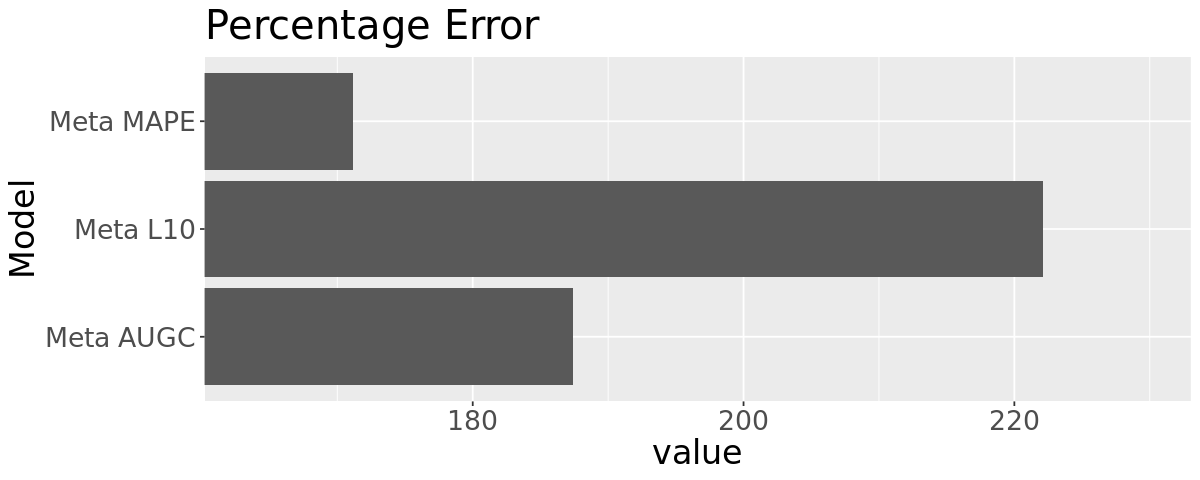

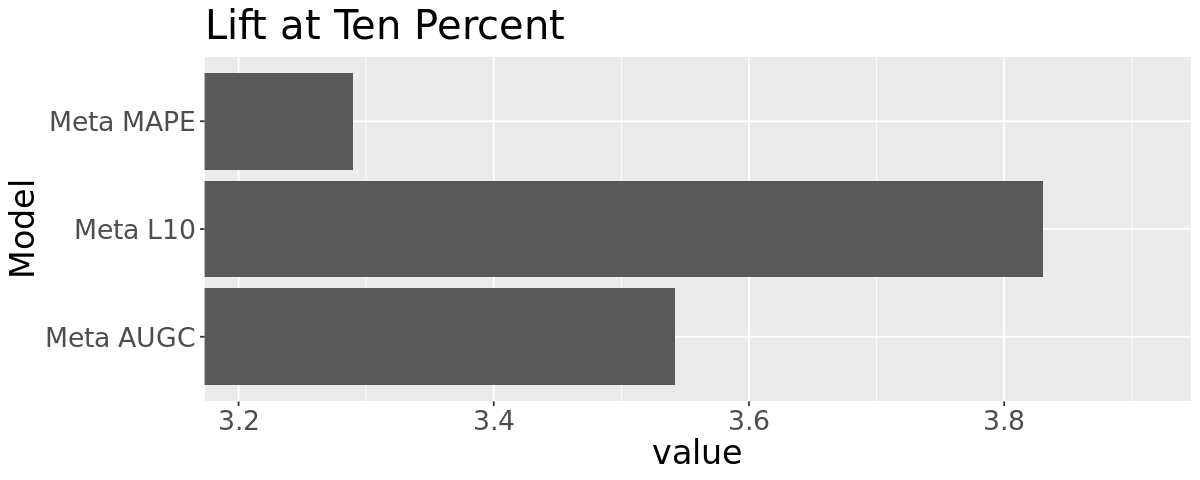

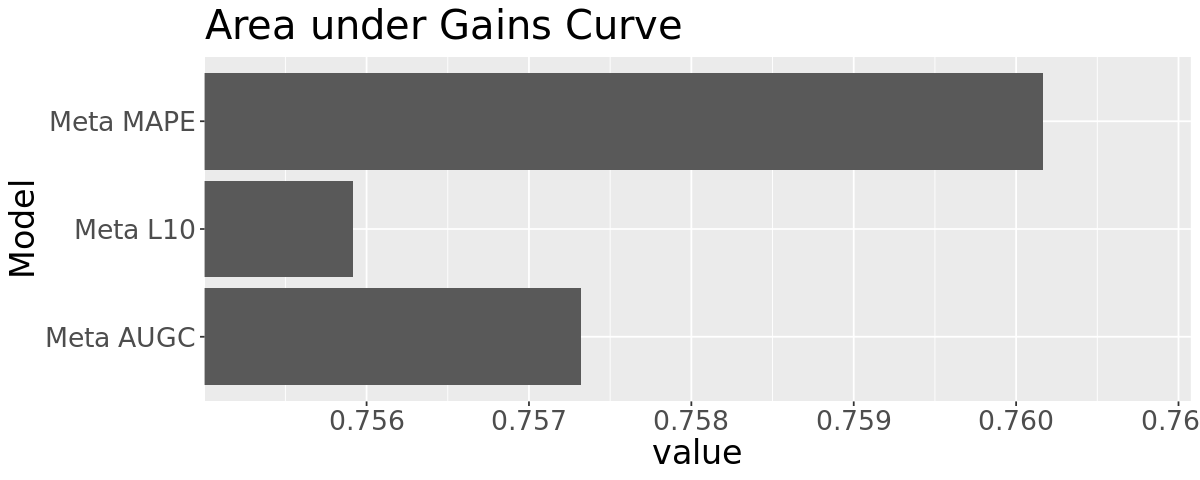

In [28]:
plot_metrics(metrics, "pe")
plot_metrics(metrics, "l10")
plot_metrics(metrics, "AUGC")

## Eval by Tld-Reseller

In [29]:
resellers <- c('NameCheap', 'Go Daddy')
tlds <- c('online', 'store', 'site')
               
c <- expand.grid(tld=tlds, reseller=resellers)
tld_registrar_indices <- tolower(paste0(c$tld, c$reseller))
tld_registrar_indices

[1] "onlinenamecheap" "storenamecheap"  "sitenamecheap"   "onlinego daddy" 
[5] "storego daddy"   "sitego daddy"

In [30]:
local_eval <- function(df, tld_registrar_indices, eval_func, pred_cols) {

    all_preds <- list()
    for (tld_registrar_index in tld_registrar_indices) {
        all_preds[[tld_registrar_index]] <- global_eval(df[df$tld_registrar_index == tld_registrar_index,], eval_func, pred_cols)
    }
    
    all_preds
}

local_mets <- local_eval(meta_preds, tld_registrar_indices, eval_func, pred_cols)
# local_mets

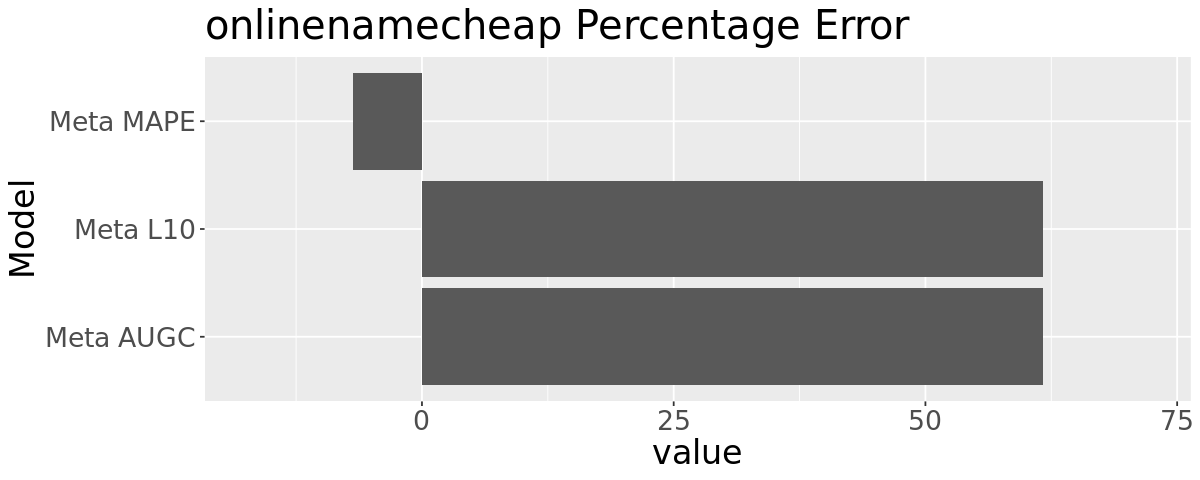

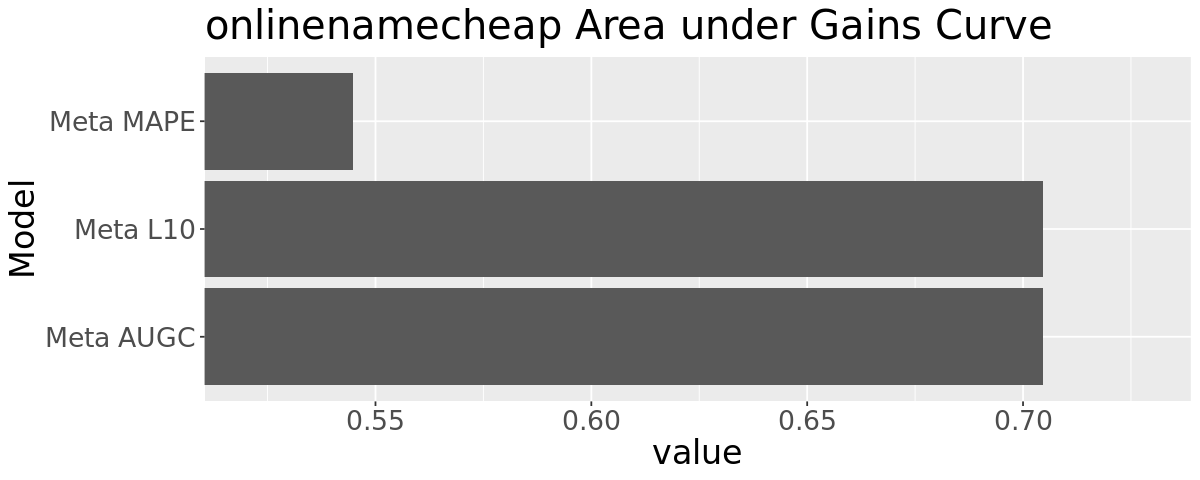

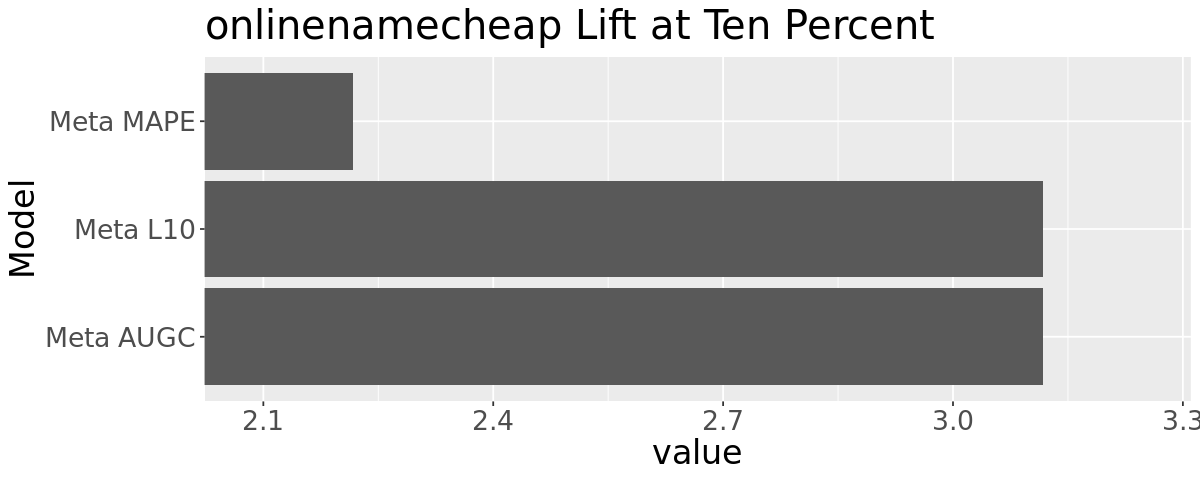

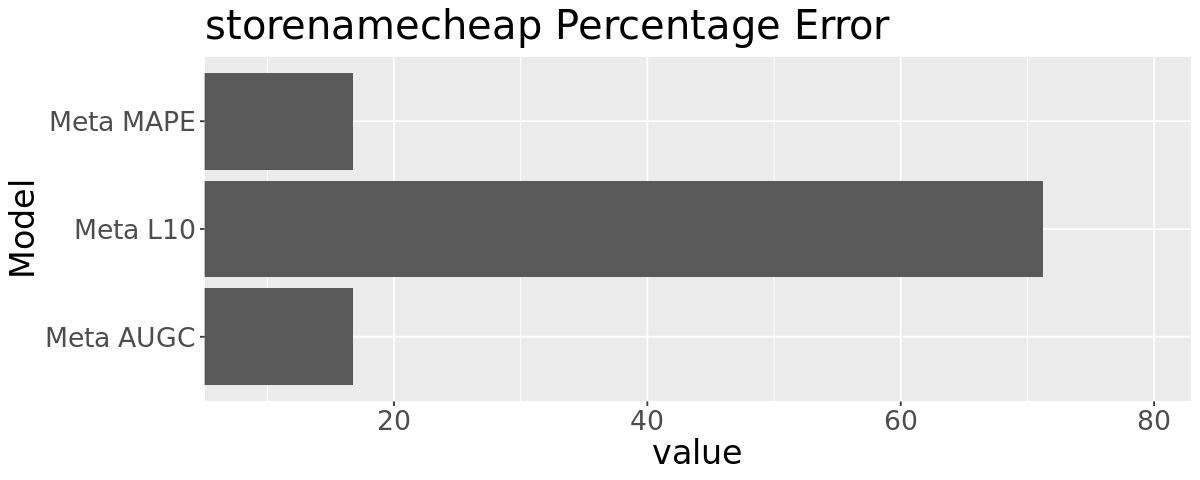

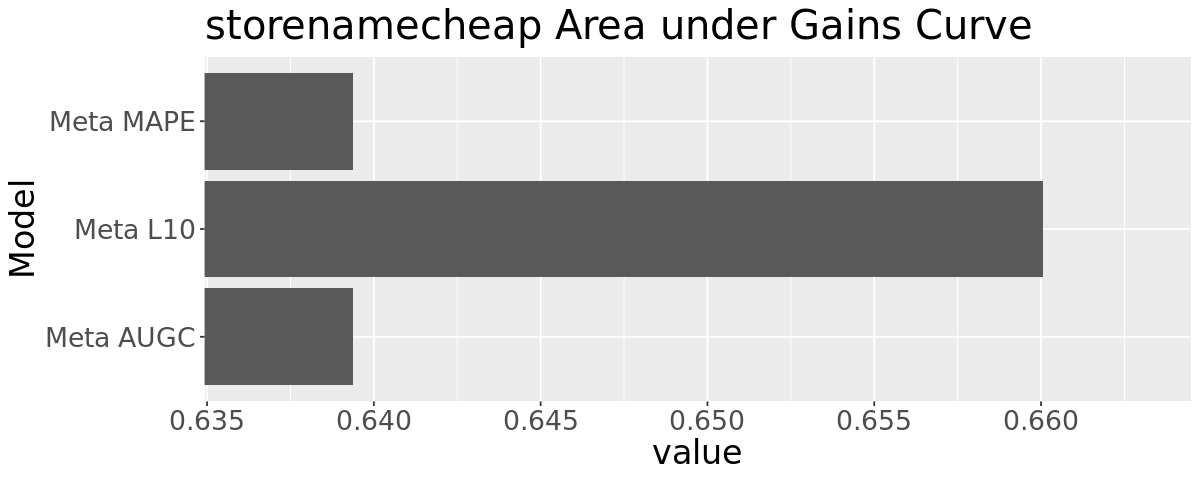

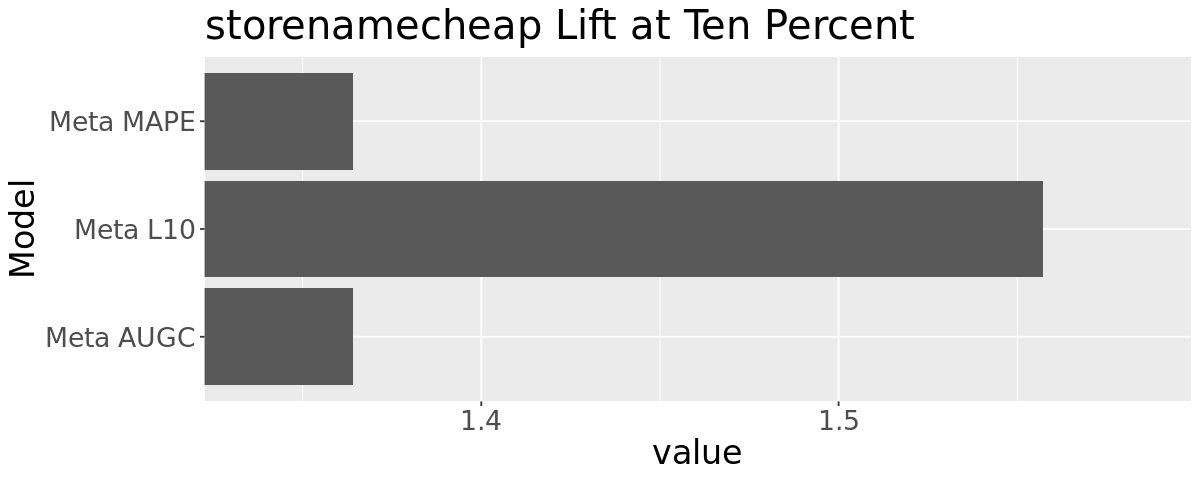

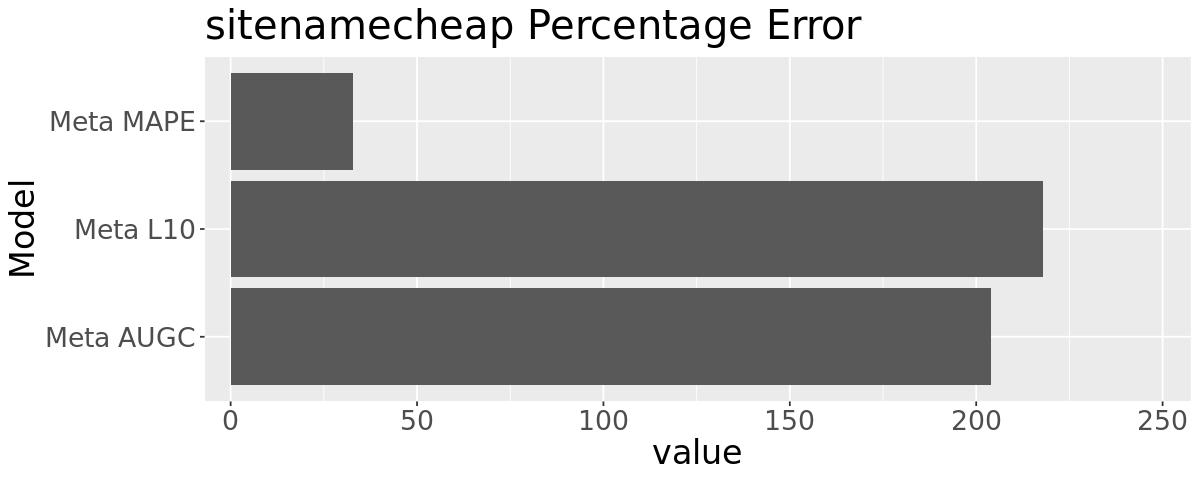

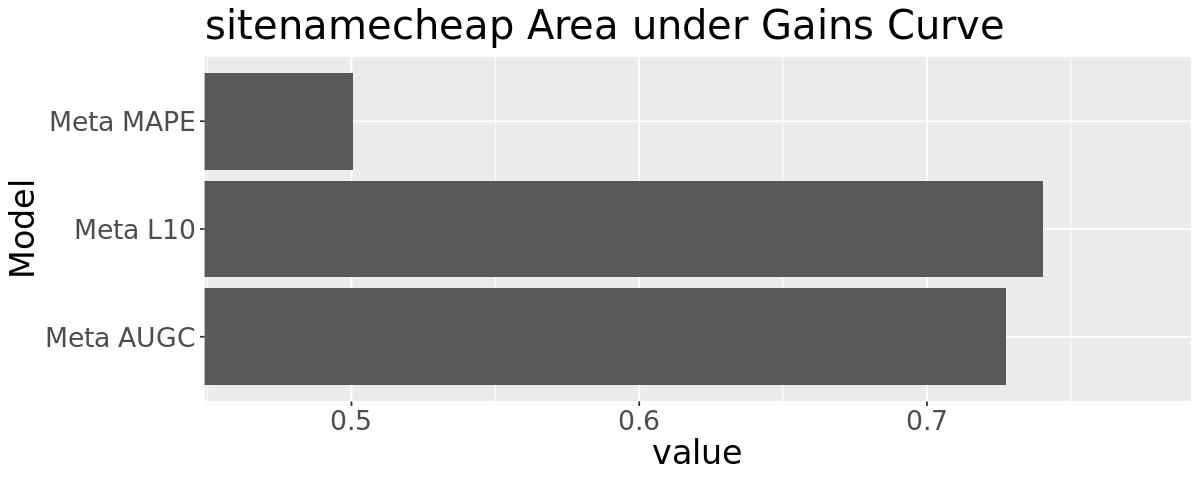

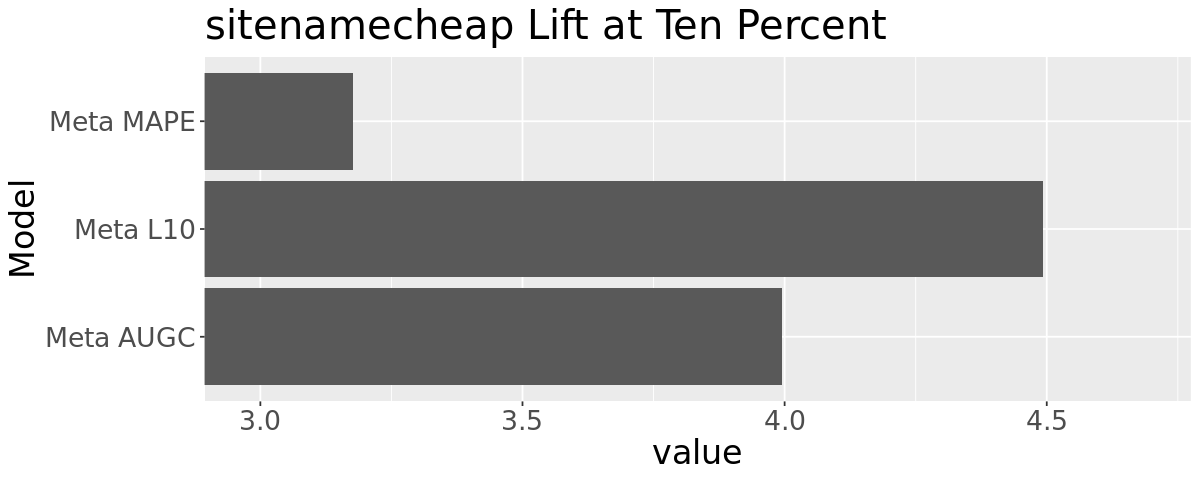

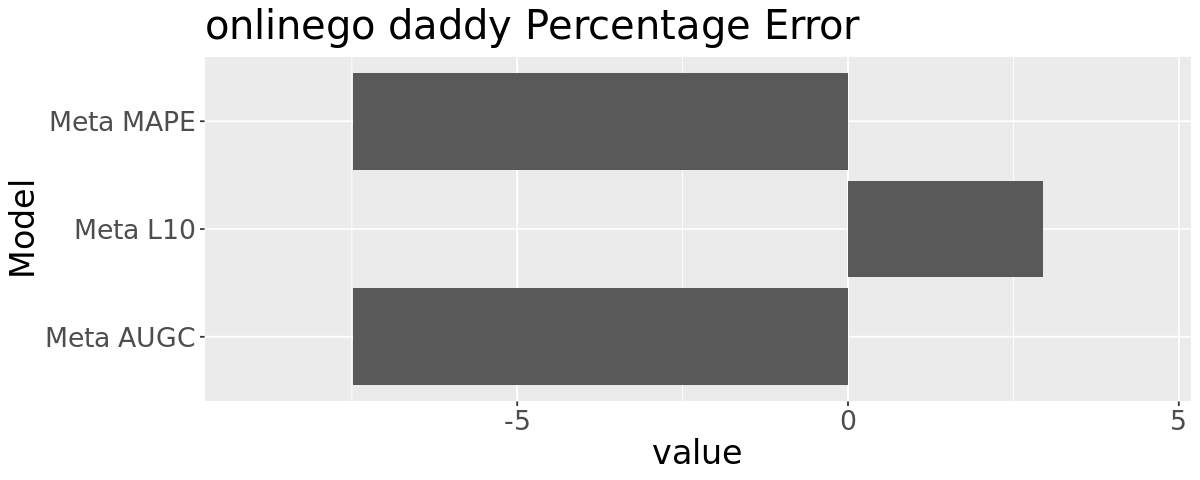

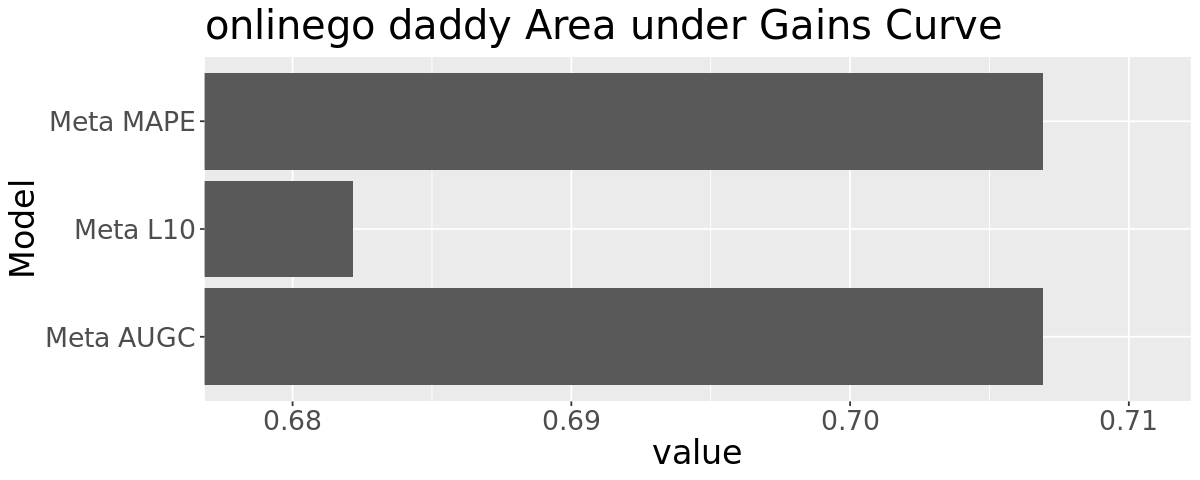

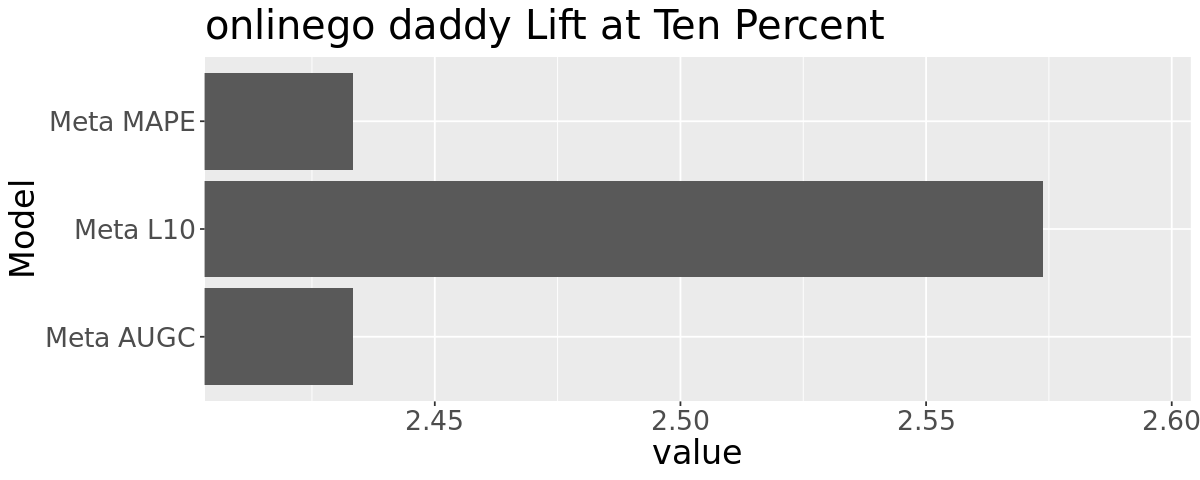

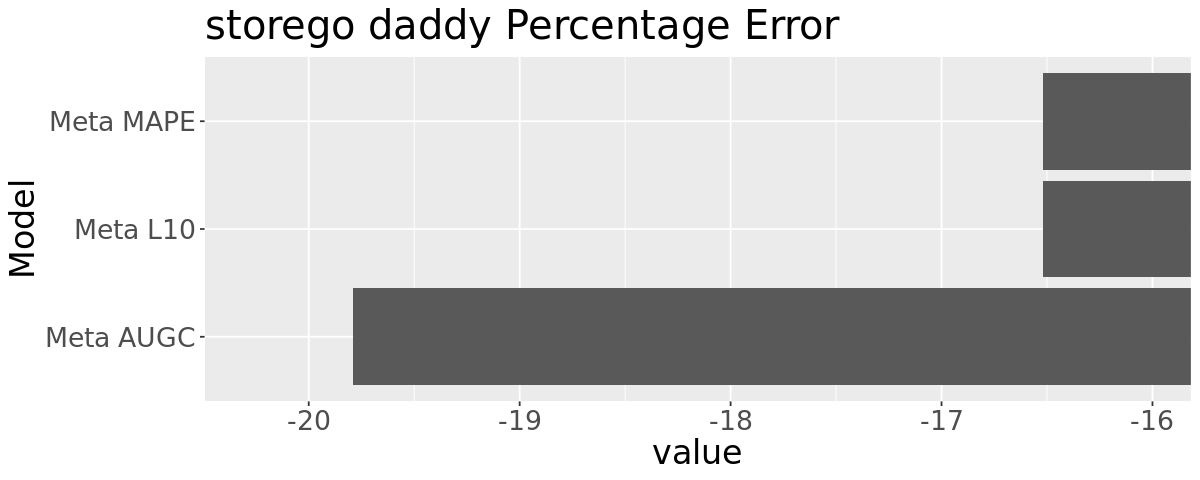

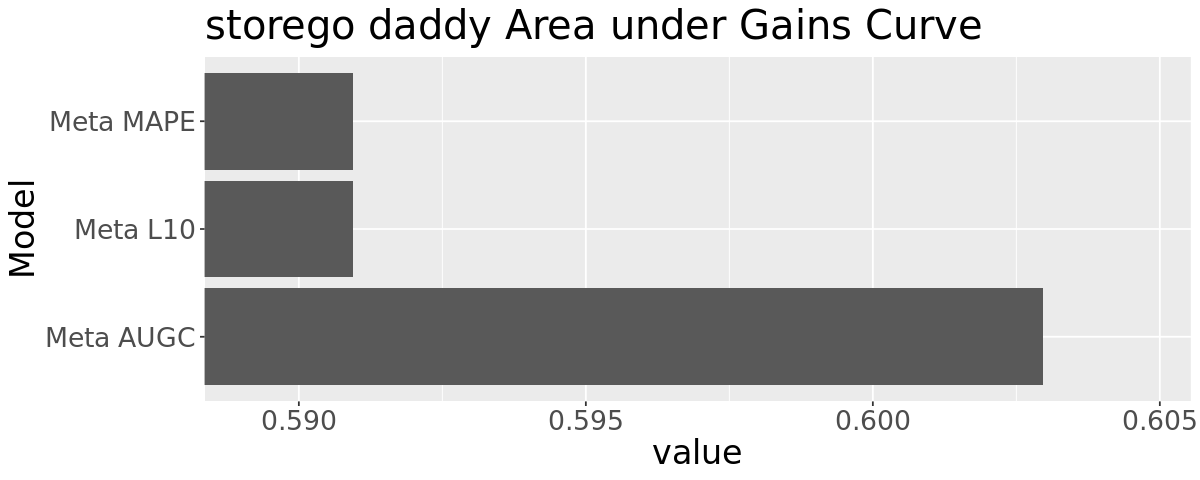

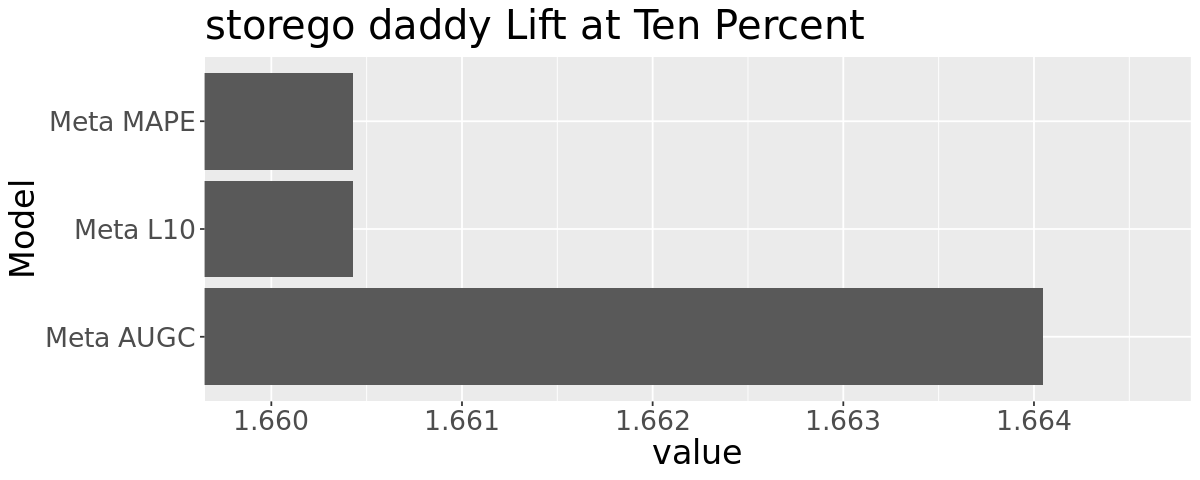

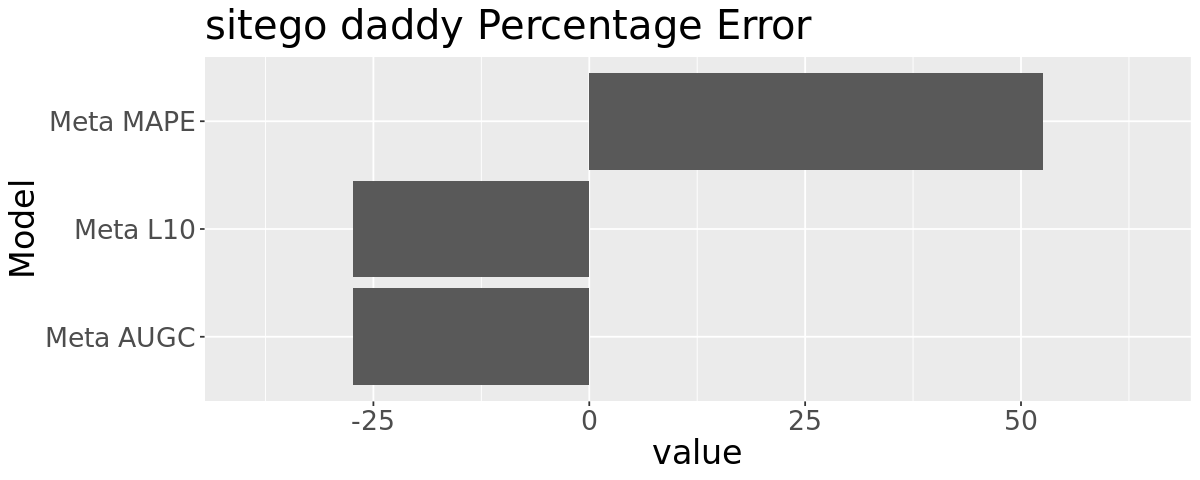

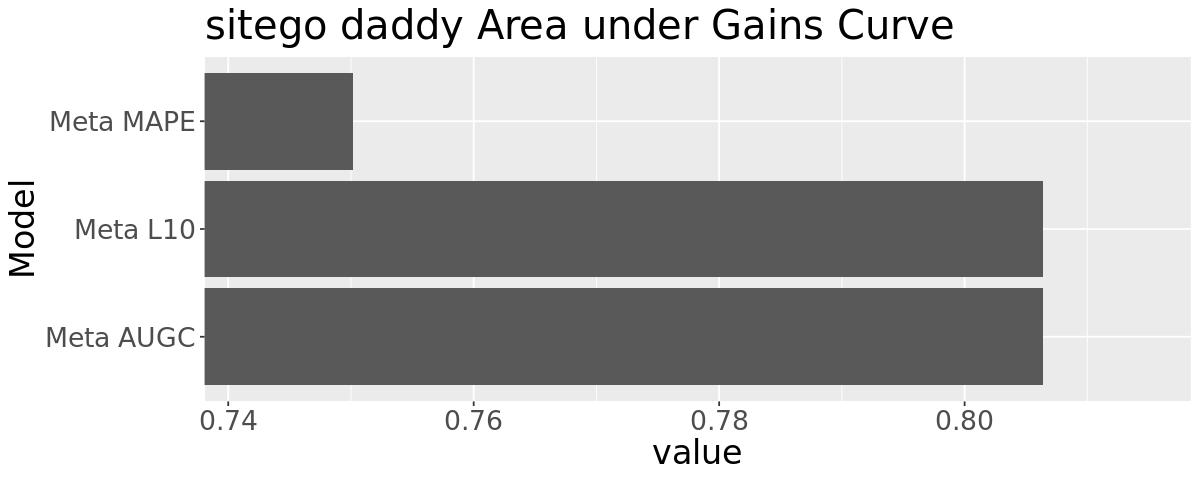

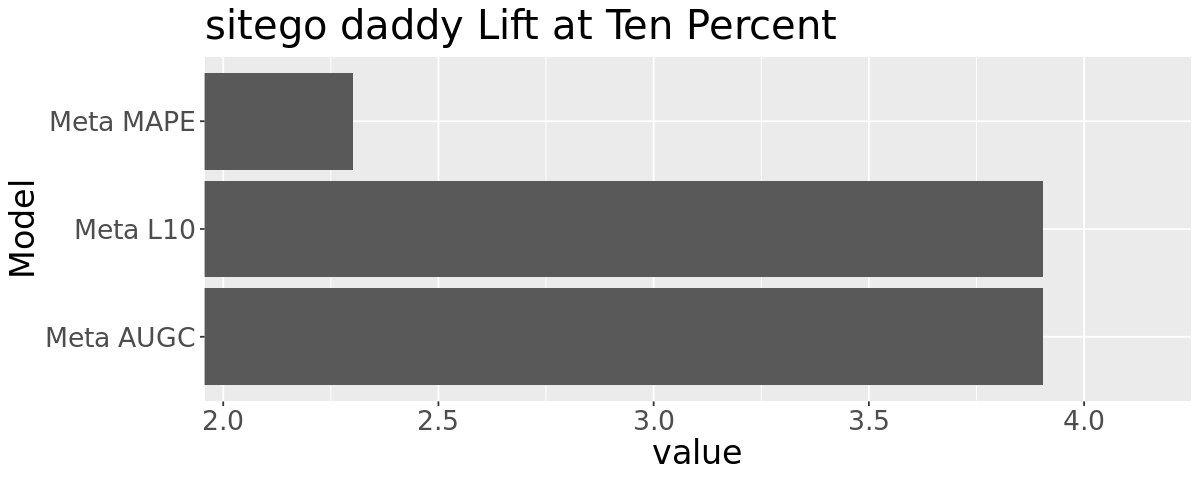

In [31]:
for (name in names(local_mets)) {
    for (met in c("pe", "AUGC", "l10")) {
        print(plot_metrics(local_mets[[name]], met, title_pref=paste0(name, " ")))
    }
}

## Rankings

In [32]:
get_rankings <- function(metrics) {
    all_preds <- list()
    for (name in names(metrics)) {
        tmp <- metrics[[name]]
        cols <- names(tmp)
        ranks <- list()
        for (col in cols) {
            if (col == "pe") {
                ranks[[col]] <- as.integer(rank(abs(tmp[, col])))
            } else {
                ranks[[col]] <- as.integer(rank(-tmp[, col]))
            }
        }
        rank_df <- data.frame(ranks, row.names=row.names(tmp))
        all_preds[[name]] <- rank_df
    }
    all_preds
}

ranks <- get_rankings(local_mets)



In [33]:
ranks

$onlinenamecheap
                  AUGC l10 pe
pred_agg_rf_ALL      4   4  4
pred_agg_glm_ALL     6   7  9
pred_seg2_glm_ALL    8   8  1
pred_seg_glm_ALL     7   5  3
pred_seg_rf_ALL      2   2  7
pred_seg2_rf_ALL     5   6  5
pred_meta_l10        2   2  7
pred_meta_auc        2   2  7
pred_meta_mape       8   8  1

$storenamecheap
                  AUGC l10 pe
pred_agg_rf_ALL      2   4  5
pred_agg_glm_ALL     1   1  9
pred_seg2_glm_ALL    6   7  2
pred_seg_glm_ALL     9   2  4
pred_seg_rf_ALL      4   3  7
pred_seg2_rf_ALL     8   9  8
pred_meta_l10        2   4  5
pred_meta_auc        6   7  2
pred_meta_mape       6   7  2

$sitenamecheap
                  AUGC l10 pe
pred_agg_rf_ALL      1   1  7
pred_agg_glm_ALL     6   6  4
pred_seg2_glm_ALL    8   7  2
pred_seg_glm_ALL     7   9  1
pred_seg_rf_ALL      3   3  9
pred_seg2_rf_ALL     4   4  5
pred_meta_l10        1   1  7
pred_meta_auc        4   4  5
pred_meta_mape       8   7  2

$`onlinego daddy`
                  AUGC l10 pe
pred_agg_rf_ALL      8   2  1
pred_agg_glm_ALL     6   9  9
pred_seg2_glm_ALL    3   7  7
pred_seg_glm_ALL     1   5  4
pred_seg_rf_ALL      5   1  3
pred_seg2_rf_ALL     7   4  5
pred_meta_l10        8   2  1
pred_meta_auc        3   7  7
pred_meta_mape       3   7  7

$`storego daddy`
                  AUGC l10 pe
pred_agg_rf_ALL      9   9  9
pred_agg_glm_ALL     7   8  1
pred_seg2_glm_ALL    1   1  5
pred_seg_glm_ALL     4   4  3
pred_seg_rf_ALL      8   7  8
pred_seg2_rf_ALL     6   6  7
pred_meta_l10        4   4  3
pred_meta_auc        1   1  5
pred_meta_mape       4   4  3

$`sitego daddy`
                  AUGC l10 pe
pred_agg_rf_ALL      8   5  8
pred_agg_glm_ALL     4   4  1
pred_seg2_glm_ALL    5   7  5
pred_seg_glm_ALL     2   2  3
pred_seg_rf_ALL      7   9  7
pred_seg2_rf_ALL     9   6  9
pred_meta_l10        2   2  3
pred_meta_auc        2   2  3
pred_meta_mape       5   7  5

In [34]:
# Combine rankings
combine_rankings <- function(ranks, avg=TRUE) {
    rank_sum <- NA
    for (name in names(ranks)) {
        if (is.na(rank_sum)) {
            rank_sum <- ranks[[name]]
        } else {
            rank_sum <- rank_sum + ranks[[name]]
        }
    }
    if (avg) {
        rank_sum <- rank_sum / length(ranks)
    }
    rank_sum
}
combine_rankings(ranks) %>% round(2)

Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”


AUGC l10  pe  
pred_agg_rf_ALL   5.33 4.17 5.67
pred_agg_glm_ALL  5.00 5.83 5.50
pred_seg2_glm_ALL 5.17 6.17 3.67
pred_seg_glm_ALL  5.00 4.50 3.00
pred_seg_rf_ALL   4.83 4.17 6.83
pred_seg2_rf_ALL  6.50 5.83 6.50
pred_meta_l10     3.17 2.50 4.33
pred_meta_auc     3.00 3.83 4.83
pred_meta_mape    5.67 6.67 3.33

## More Tld Resellers

In [35]:
resellers <- c('NameCheap', 'Go Daddy', 'Alibaba', 'GMO')
tlds <- c('online', 'store', 'site', 'tech', 'space')
               
c <- expand.grid(tld=tlds, reseller=resellers)
tld_registrar_indices <- tolower(paste0(c$tld, c$reseller))
tld_registrar_indices

[1] "onlinenamecheap" "storenamecheap"  "sitenamecheap"   "technamecheap"  
 [5] "spacenamecheap"  "onlinego daddy"  "storego daddy"   "sitego daddy"   
 [9] "techgo daddy"    "spacego daddy"   "onlinealibaba"   "storealibaba"   
[13] "sitealibaba"     "techalibaba"     "spacealibaba"    "onlinegmo"      
[17] "storegmo"        "sitegmo"         "techgmo"         "spacegmo"

In [36]:
local_mets <- local_eval(meta_preds, tld_registrar_indices, eval_func, pred_cols)
rank_comb <- combine_rankings(get_rankings(local_mets))
rank_comb %>% round(2)

Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the fi

AUGC l10  pe  
pred_agg_rf_ALL   4.20 3.85 4.75
pred_agg_glm_ALL  5.85 5.60 4.10
pred_seg2_glm_ALL 5.25 5.80 3.80
pred_seg_glm_ALL  6.15 4.65 3.50
pred_seg_rf_ALL   4.15 4.20 6.55
pred_seg2_rf_ALL  6.25 6.35 7.25
pred_meta_l10     3.55 3.85 5.25
pred_meta_auc     2.95 3.90 5.00
pred_meta_mape    5.20 5.25 3.35

In [37]:
local_mets <- local_eval(meta_preds_2021, tld_registrar_indices, eval_func, pred_cols)
rank_comb <- combine_rankings(get_rankings(local_mets))
rank_comb %>% round(2)

Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(rank_sum)) {:
“the condition has length > 1 and only the fi

AUGC l10  pe  
pred_agg_rf_ALL   4.85 4.05 5.70
pred_agg_glm_ALL  5.55 6.55 4.30
pred_seg2_glm_ALL 4.80 5.70 4.55
pred_seg_glm_ALL  4.80 4.70 3.35
pred_seg_rf_ALL   4.75 3.85 5.70
pred_seg2_rf_ALL  5.80 5.85 6.85
pred_meta_l10     5.10 4.85 5.45
pred_meta_auc     4.15 3.75 3.85
pred_meta_mape    3.75 4.25 3.75

## Variable importance

In [105]:
load(file.path(fullDir, "model_agg_rf_ALL.Rdata"))

In [90]:
load(file.path(fullDir, "model_seg_rf_GoDaddy.Rdata"))

In [99]:
load(file.path(fullDir, "model_seg2_rf_onlinegodaddy.Rdata"))

In [93]:
load(file.path(fullDir, "model_seg_rf_Namecheap.Rdata"))

In [8]:
fig(10,10)
plot_importance <- function(model_rf) {
    v<-as.numeric(as.vector(model_rf$variable.importance))
    w<-(as.vector((names(model_rf$variable.importance))))
    DF<-data.frame(w=w, v=v)

    ggplot(DF, aes(x=reorder(w,v), y=v,fill=v))+ 
      geom_bar(stat="identity", position="dodge")+ coord_flip()+
      ylab("Variable Importance")+
      xlab("")+
      ggtitle("Information Value Summary")+
    #   guides(fill=F)+
      scale_fill_gradient(low="red", high="blue")
}


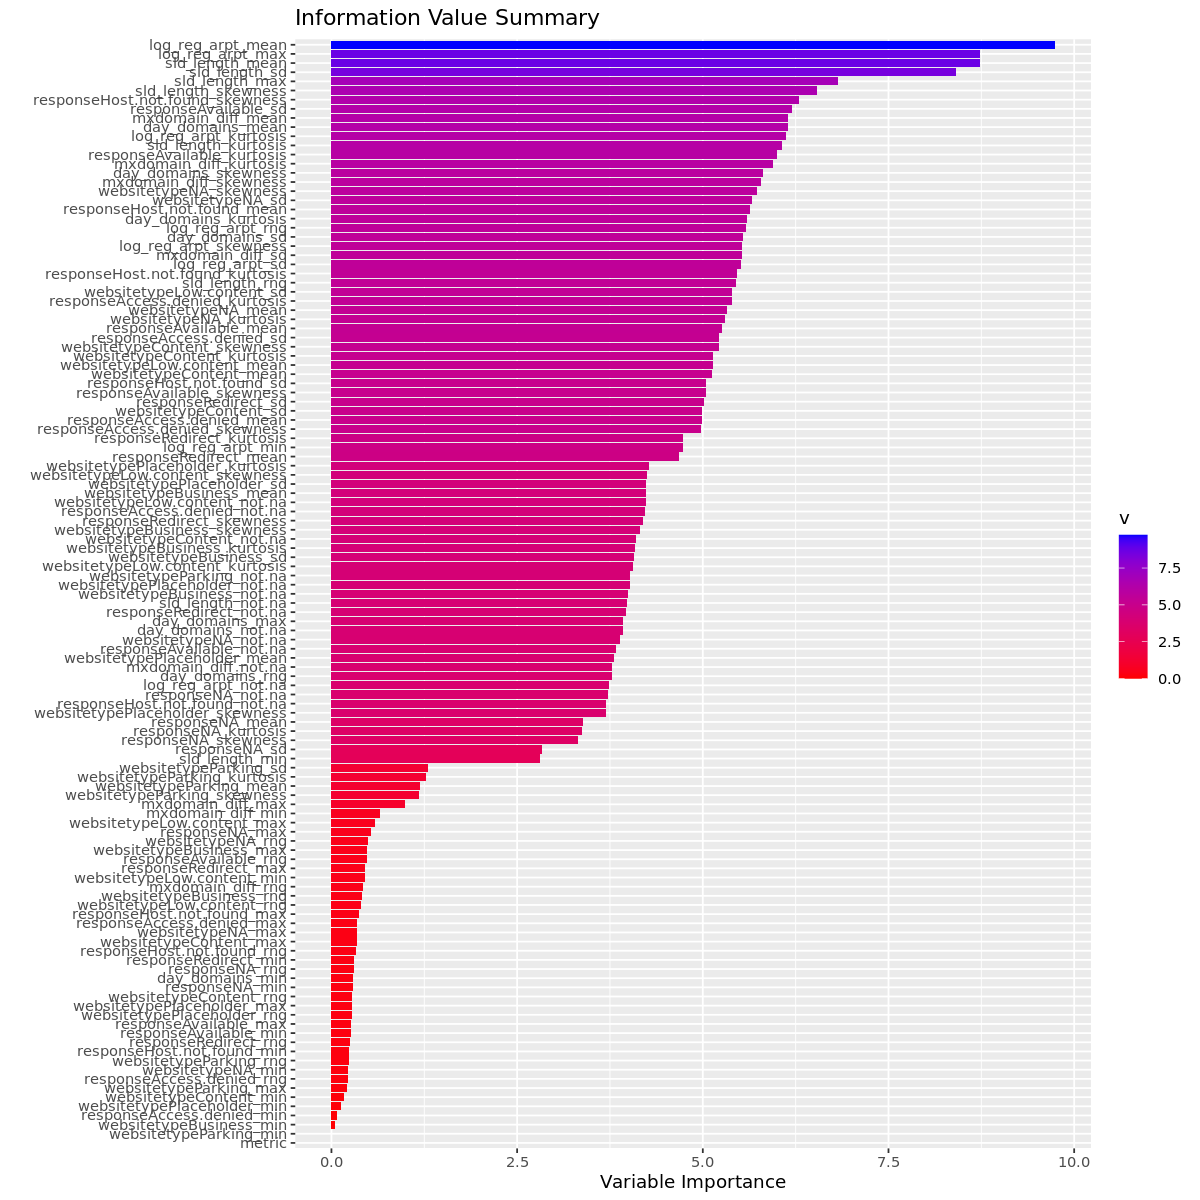

In [31]:
plot_importance(model)

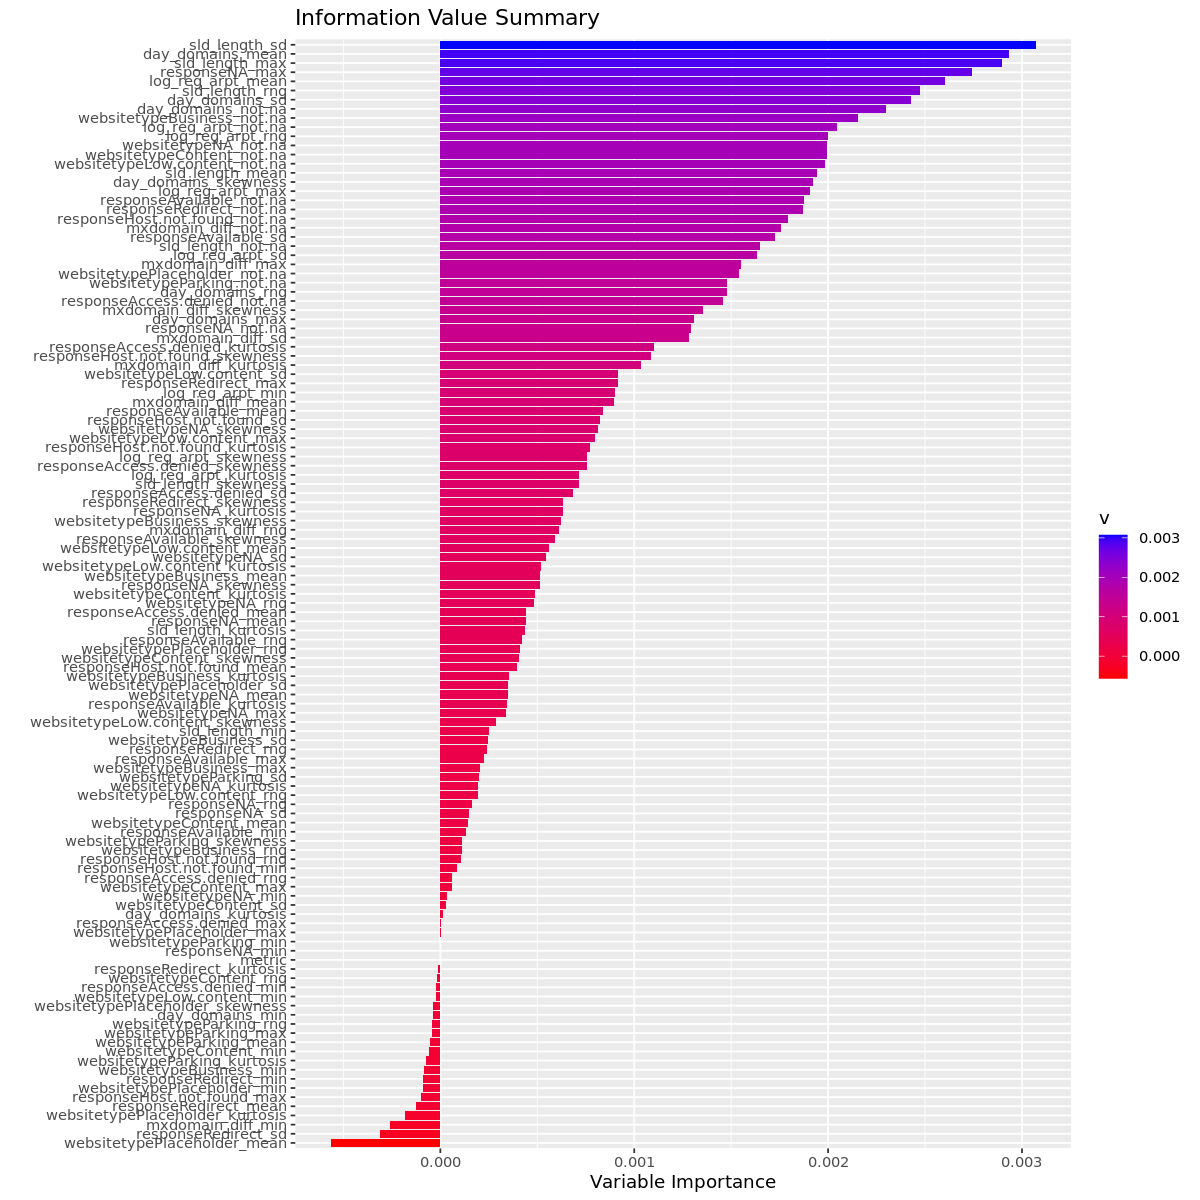

In [34]:
plot_importance(model)

In [ ]:
plot_importance(model_agg_rf_ALL)

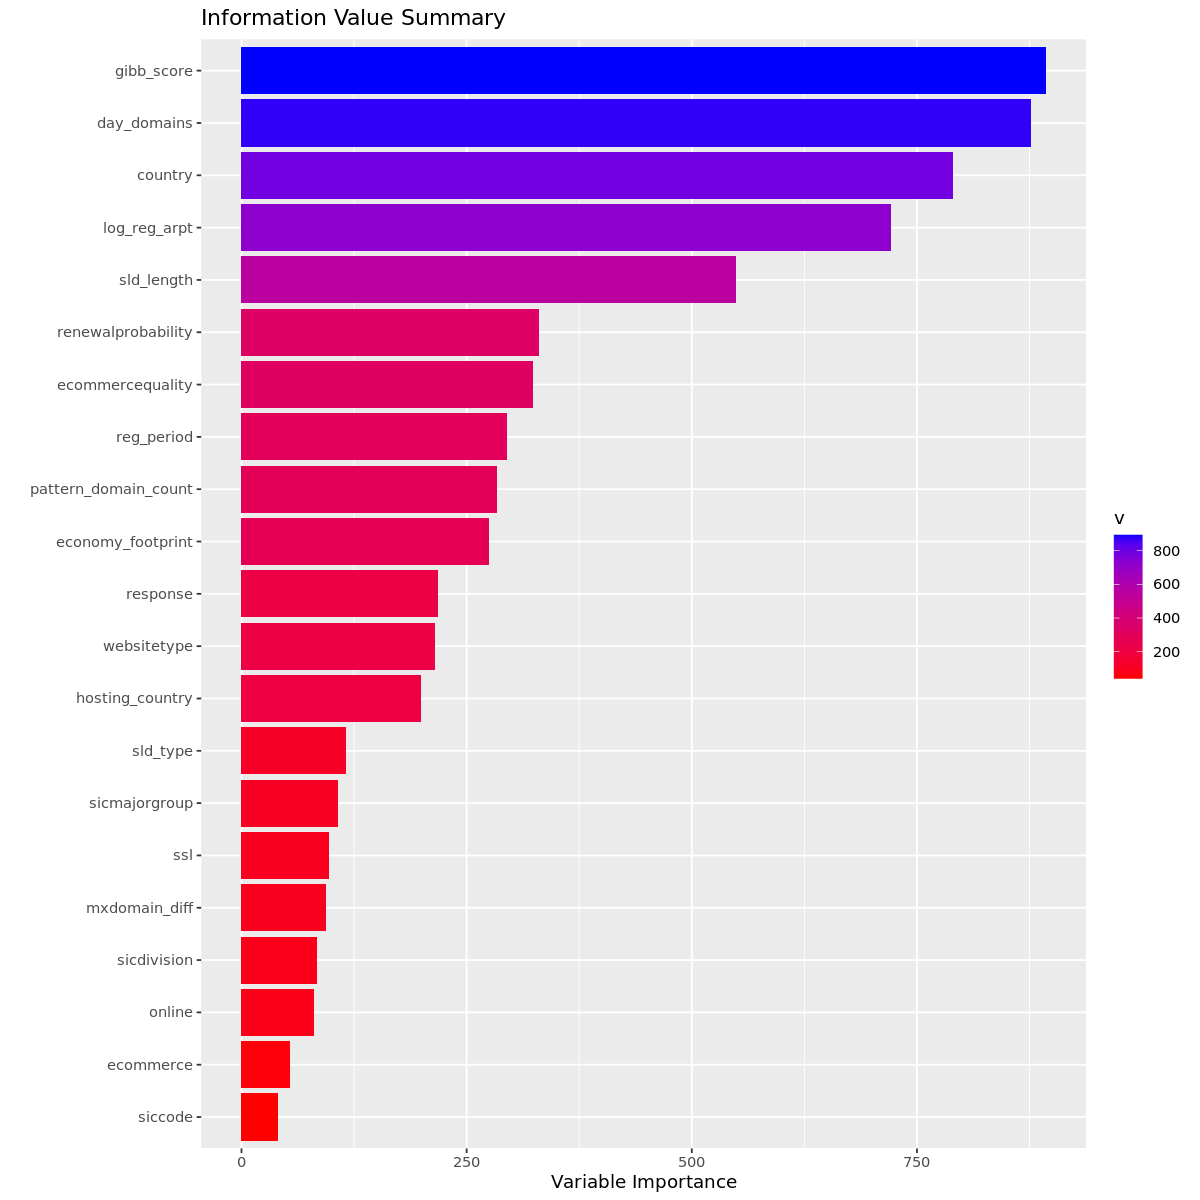

In [103]:
plot_importance(model_seg2_rf_onlinegodaddy)

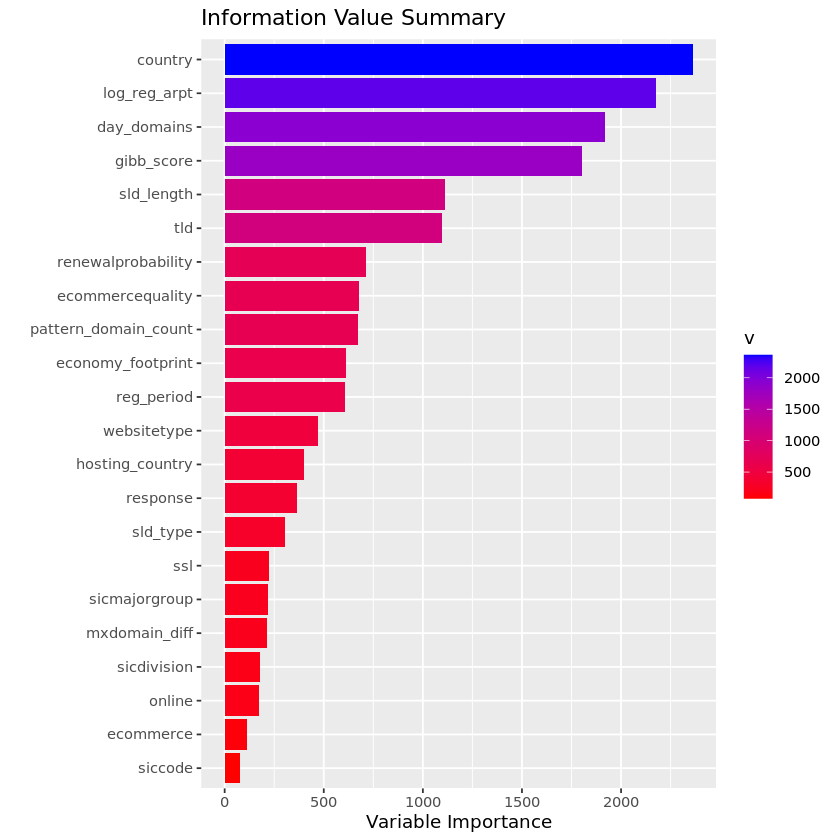

In [91]:
plot_importance(model_seg_rf_GoDaddy)

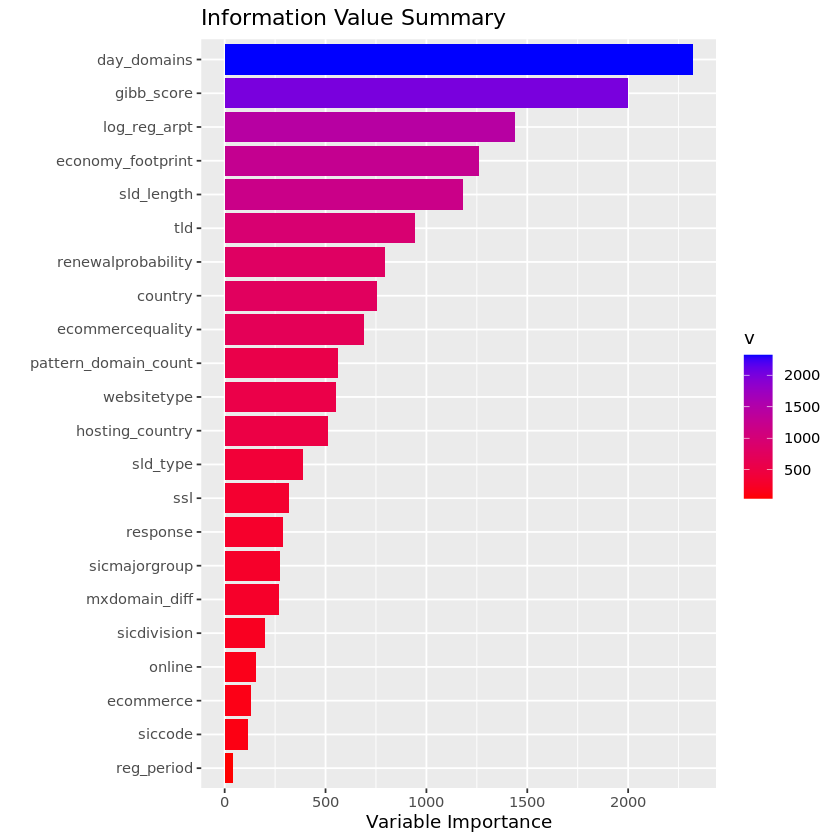

In [94]:
plot_importance(model_seg_rf_Namecheap)

In [110]:
load(file.path(fullDir, "model_seg_glm_GoDaddy.Rdata"))

In [115]:
load(file.path(fullDir, "model_seg_glm_Namecheap.Rdata"))

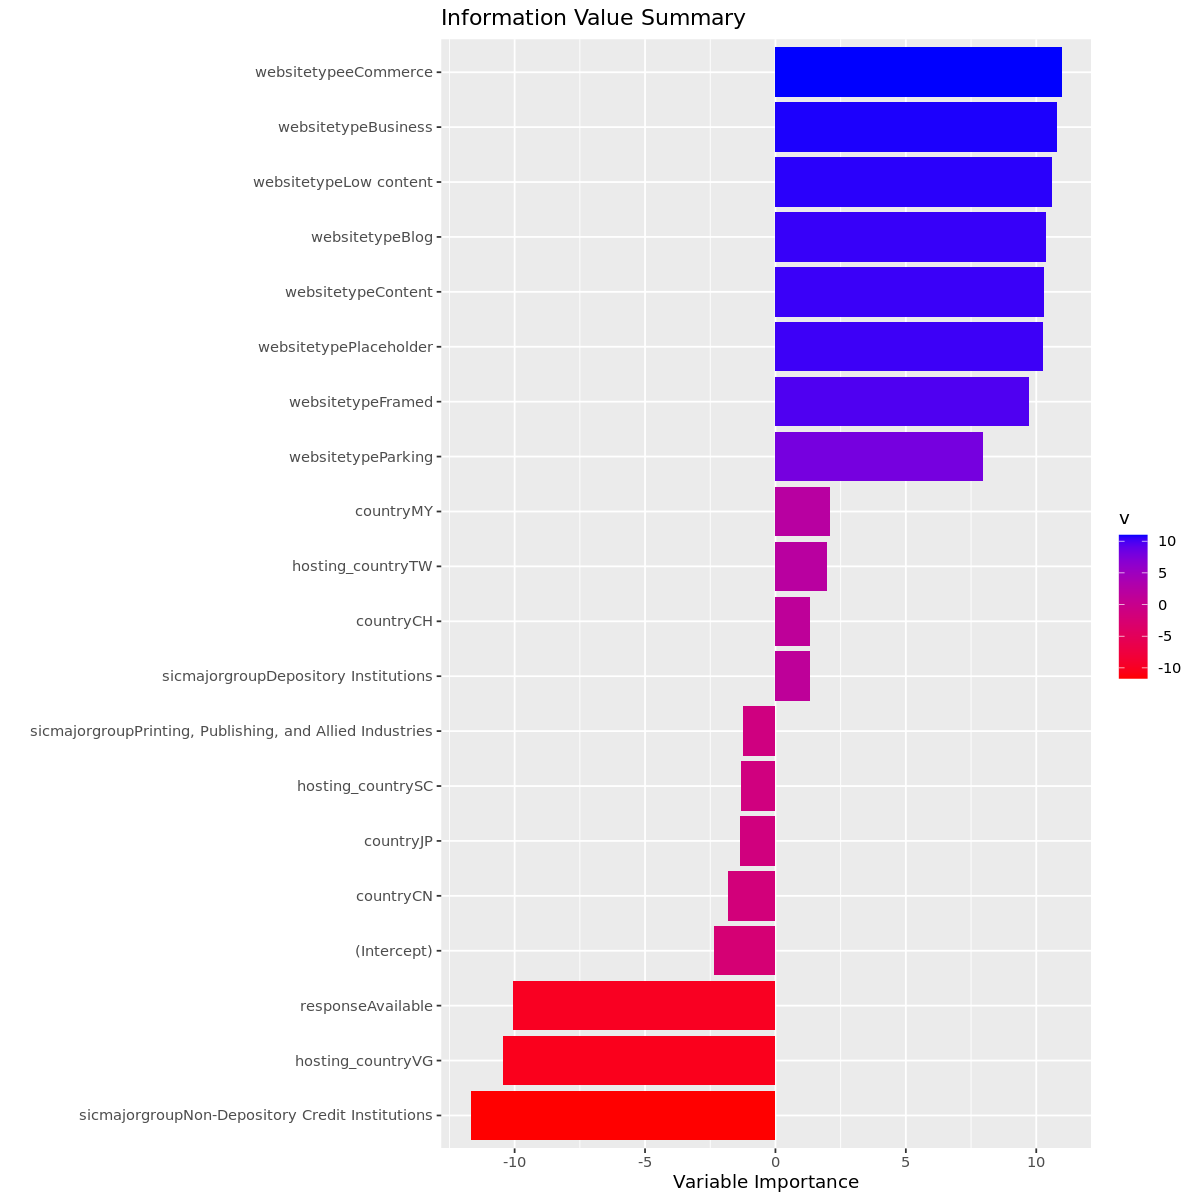

In [113]:
plot_coef <- function(model_glm, n=20) {
    c = coef(model_seg_glm_GoDaddy)
    argsort <- order(abs(c), decreasing=TRUE)
    c_vec = c[argsort][1:n]
    
    v<-as.numeric(as.vector(c_vec))
    w<-(as.vector((names(c_vec))))
    DF<-data.frame(w=w, v=v)

    ggplot(DF, aes(x=reorder(w,v), y=v,fill=v))+ 
      geom_bar(stat="identity", position="dodge")+ coord_flip()+
      ylab("Variable Importance")+
      xlab("")+
      ggtitle("Information Value Summary")+
    #   guides(fill=F)+
      scale_fill_gradient(low="red", high="blue")
}

plot_coef(model_seg_glm_GoDaddy)

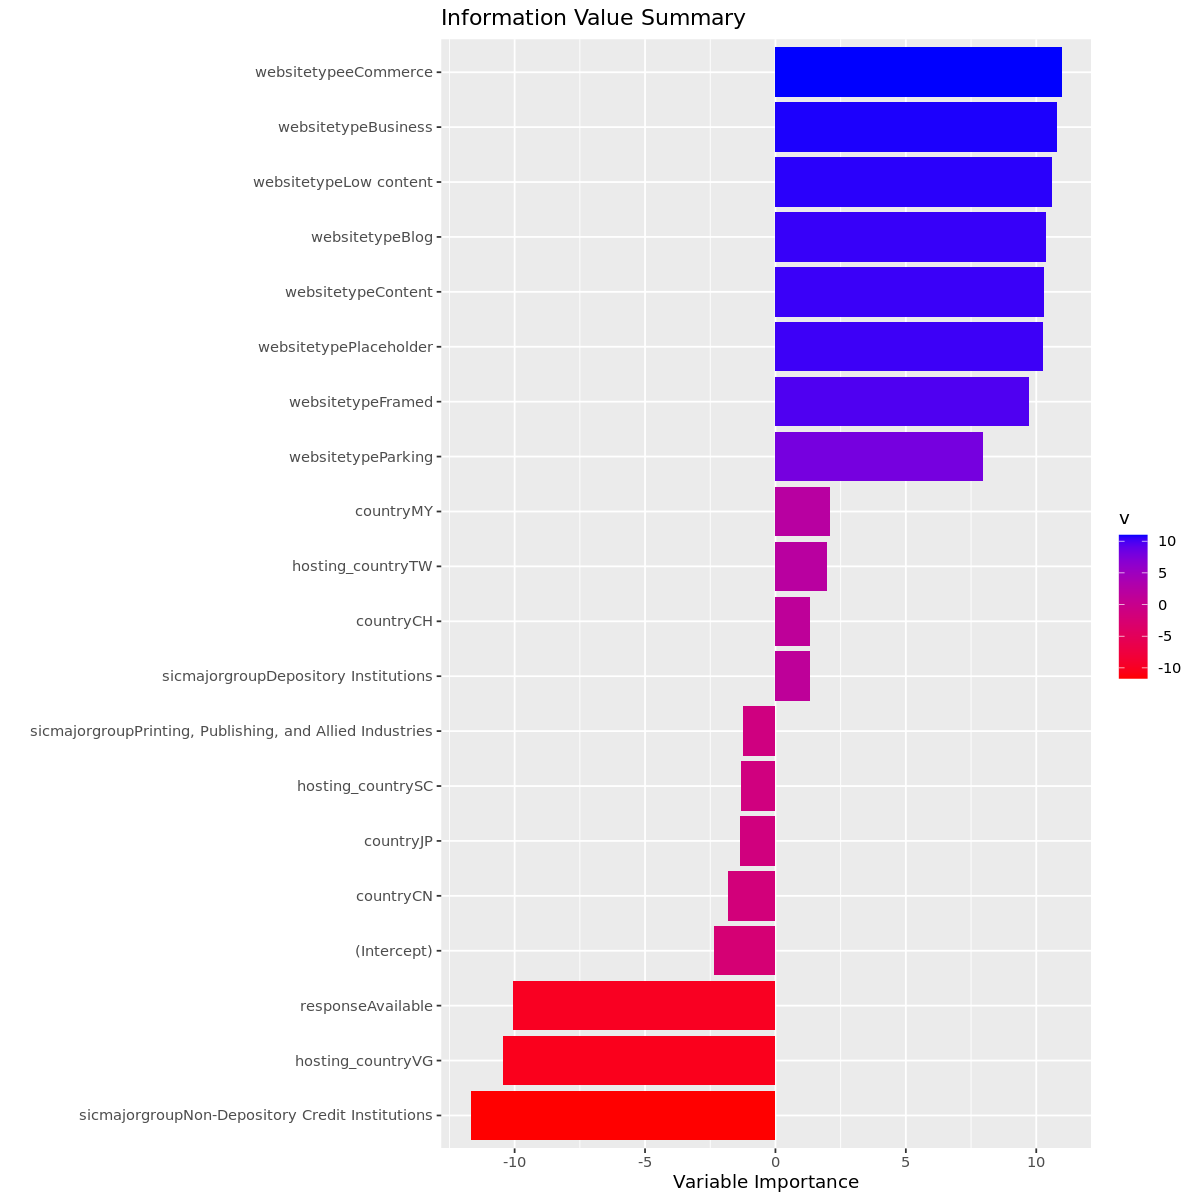

In [116]:
plot_coef(model_seg_glm_Namecheap)